# TCDS - Final Project

![Favorita Corporation](logo_favorita_s.png "Favorita Corporation")
# Forecasting purchases of items per day and store

http://www.corporacionfavorita.com/



***


# Methodology
***

## Exploratory Data Analysis (EDA) 
In the EDA we will show descriptive statistics of our data using basic statistics:
- 1. For continuous numeric variables, we use the following statistics:
    - 1.1 Mean and Standard deviation
    - 1.2 Median and Interquartile rate
    - 1.3 Minimum and Maximum
    - 1.4 Identify, quantity,Percentage and type of missing values 
  
  
- 2. Identify data types and data distributions - For Nominal and ordinal data (categorical data):
    - 2.1 Frequencies (% of each category - ordered in descending order)
    - 2.2 % of missing values
    
    
- 3. Identify outliers (univariate and multivariate)
     We will also show graphs which will help us to unsderstand distribution types of numeric and categorical data.

- 4. Identify data patterns (using cluster analysis / PCA)

## Clear outcome variable definition:
Forecasting purchases of items per day and store  

## Variable engineering:
we decided to add some pameters to oue dataset: oil price 15 days ago 30 days ago and the ratio of changes from actual price. becouse we assume that oil price influance after aperiod and not at the same day.
we add also the ratio of city population so it will be a number and not category.
and we add log of weight_unit_sale so it will normalize the distribution and will help for graphs visualisations.


## Outliers determination and treatment:



## Missing values - determination of MCAR-MAR-MNAR, treatment: 
in our case the only missing values where in daily oil price - about 30% of records where nan (NULL)
it is MNAR because its wekends dates . the way we treated it was by updating tae last day known price 

## Data retrieval protocol: the excel file

***

# import packeges:

In [1]:
#import packeges

from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import pyMechkar as mechkar
import pyodbc 

from sqlalchemy import create_engine
import urllib

### Display options:

In [2]:
#configure the output graght

pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)
pd.set_option('display.max_colwidth',500)
pd.set_option('display.precision',6)
pd.options.display.float_format = '{0:,.2f}'.format

In [3]:
#read the SQL - prepared dataset
sql_conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=LAPTOP-FMCJ0N31\SQLEXPRESS01;'
                      'Database=EXPLOR_DATA;'
                      'Trusted_Connection=yes;')

#query ="SELECT top 10000 * from final_train ORDER BY NEWID()" 
query ="SELECT  * from final_train"

#execute sql query
df= pd.read_sql(query,sql_conn)

In [4]:
## WE TRIED TO WRITE BACKTO THE DB WITH NO SUCCESS SO FAR

# params = urllib.parse.quote_plus('Driver={SQL Server};'
#                     'Server=LAPTOP-FMCJ0N31\SQLEXPRESS01;'
#                    'Database=EXPLOR_DATA;'
#                   'Trusted_Connection=yes;')

# engine = create_engine("mssql+pyodbc:///?odbc_connect=%s" %params)

# X.to_sql(name='X', con=engine, if_exists='replace', index=False)

In [6]:
#read FROM SQL - prepared dataset categorys

sql_conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=LAPTOP-FMCJ0N31\SQLEXPRESS01;'
                      'Database=EXPLOR_DATA;'
                      'Trusted_Connection=yes;')

query ="SELECT  * from FamilyCategory"

#execute sql query
CAT_DF= pd.read_sql(query,sql_conn)

In [11]:
X = df

In [7]:
CAT_DF

id    family_desc                 family_name
0    1   Family_cat_1                  AUTOMOTIVE
1    2   Family_cat_2                   BABY CARE
2    3   Family_cat_3                      BEAUTY
3    4   Family_cat_4                   BEVERAGES
4    5   Family_cat_5                       BOOKS
5    6   Family_cat_6                BREAD/BAKERY
6    7   Family_cat_7                 CELEBRATION
7    8   Family_cat_8                    CLEANING
8    9   Family_cat_9                       DAIRY
9   10  Family_cat_10                        DELI
10  11  Family_cat_11                        EGGS
11  12  Family_cat_12                FROZEN FOODS
12  13  Family_cat_13                   GROCERY I
13  14  Family_cat_14                  GROCERY II
14  15  Family_cat_15                    HARDWARE
15  17  Family_cat_17         HOME AND KITCHEN II
16  18  Family_cat_18             HOME APPLIANCES
17  19  Family_cat_19                   HOME CARE
18  20  Family_cat_20                  LADIESWEAR
19  21  Family_cat_21             LAWN AND GARDEN
20  22  Family_cat_22                    LINGERIE
21  23  Family_cat_23            LIQUOR,WINE,BEER
22  24  Family_cat_24                   MAGAZINES
23  25  Family_cat_25                       MEATS
24  26  Family_cat_26               PERSONAL CARE
25  27  Family_cat_27                PET SUPPLIES
26  28  Family_cat_28     PLAYERS AND ELECTRONICS
27  29  Family_cat_29                     POULTRY
28  30  Family_cat_30              PREPARED FOODS
29  31  Family_cat_31                     PRODUCE
30  32  Family_cat_32  SCHOOL AND OFFICE SUPPLIES
31  33  Family_cat_33                     SEAFOOD

In [17]:
#sampling X_sample for 1000 & X_sample1 for 10000 samples

X_sample=X.sample(n=1000)
X_sample1=X.sample(n=10000)
#df_bck=df.copy()
#X_bck=X.copy()





### All parameters and Types

In [16]:
X.head(500)

date  month  day_of_week  season  store_nbr  item_nbr  \
0    2014-04-01      4            3       1          1    105575   
1    2014-04-01      4            3       1          1    111223   
2    2014-04-01      4            3       1          1    114790   
3    2014-04-01      4            3       1          1    115611   
4    2014-04-01      4            3       1          1    115892   
5    2014-04-01      4            3       1          1    115894   
6    2014-04-01      4            3       1          1    116017   
7    2014-04-01      4            3       1          1    153267   
8    2014-04-01      4            3       1          1    159156   
9    2014-04-01      4            3       1          1    165594   
10   2014-04-01      4            3       1          1    168927   
11   2014-04-01      4            3       1          1    208384   
12   2014-04-01      4            3       1          1    211203   
13   2014-04-01      4            3       1          1    215331   
14   2014-04-01      4            3       1          1    215352   
15   2014-04-01      4            3       1          1    219150   
16   2014-04-01      4            3       1          1    220435   
17   2014-04-01      4            3       1          1    222879   
18   2014-04-01      4            3       1          1    257847   
19   2014-04-01      4            3       1          1    258396   
20   2014-04-01      4            3       1          1    261052   
21   2014-04-01      4            3       1          1    261053   
22   2014-04-01      4            3       1          1    265254   
23   2014-04-01      4            3       1          1    265279   
24   2014-04-01      4            3       1          1    265559   
25   2014-04-01      4            3       1          1    273528   
26   2014-04-01      4            3       1          1    305080   
27   2014-04-01      4            3       1          1    305229   
28   2014-04-01      4            3       1          1    311994   
29   2014-04-01      4            3       1          1    314384   
30   2014-04-01      4            3       1          1    315176   
31   2014-04-01      4            3       1          1    315179   
32   2014-04-01      4            3       1          1    315180   
33   2014-04-01      4            3       1          1    315220   
34   2014-04-01      4            3       1          1    315277   
35   2014-04-01      4            3       1          1    315474   
36   2014-04-01      4            3       1          1    320682   
37   2014-04-01      4            3       1          1    323013   
38   2014-04-01      4            3       1          1    364606   
39   2014-04-01      4            3       1          1    364738   
40   2014-04-01      4            3       1          1    368136   
41   2014-04-01      4            3       1          1    378685   
42   2014-04-01      4            3       1          1    410257   
43   2014-04-01      4            3       1          1    414353   
44   2014-04-01      4            3       1          1    414750   
45   2014-04-01      4            3       1          1    418235   
46   2014-04-01      4            3       1          1    452212   
47   2014-04-01      4            3       1          1    457928   
48   2014-04-01      4            3       1          1    464374   
49   2014-04-01      4            3       1          1    502331   
..          ...    ...          ...     ...        ...       ...   
450  2014-04-01      4            3       1          3   1105212   
451  2014-04-01      4            3       1          3   1109389   
452  2014-04-01      4            3       1          3   1114566   
453  2014-04-01      4            3       1          3   1143685   
454  2014-04-01      4            3       1          3   1146496   
455  2014-04-01      4            3       1          3   1146786   
456  2014-04-01      4            3       1          3   1146795   

#### we see taht some are objects

In [8]:
X.dtypes

date                     object
month                     int64
day_of_week               int64
season                    int64
store_nbr                 int64
item_nbr                  int64
Toal_trans_store_day      int64
city                     object
city_population           int64
state                    object
type                     object
cluster                   int64
family                   object
class                     int64
LocalHoliday              int64
RegionalHoliday           int64
NationalHoliday           int64
weight_unit_sale        float64
onpromotion               int64
dcoilwtico               object
perishable                int64
cat_type_A                int64
cat_type_B                int64
cat_type_C                int64
cat_type_D                int64
cat_type_E                int64
Family_cat_1              int64
Family_cat_2              int64
Family_cat_3              int64
Family_cat_4              int64
Family_cat_5              int64
Family_c

***


#### convertion of parameters from int and object types to category

In [15]:
for col in ['cat_type_A', 'cat_type_B', 'cat_type_C','cat_type_D','cat_type_E','city','state', 
            'is_pay_date_m2','is_pay_date_m1','is_pay_date','is_pay_date_p1','is_pay_date_p2',
            'Family_cat_1','Family_cat_2','Family_cat_3','Family_cat_4','Family_cat_5','Family_cat_6',
            'Family_cat_7','Family_cat_8','Family_cat_9','Family_cat_10','Family_cat_11','Family_cat_12',
              'Family_cat_13','Family_cat_14','Family_cat_15','Family_cat_17','Family_cat_18',
            'Family_cat_19','Family_cat_20','Family_cat_21','Family_cat_22','Family_cat_23','Family_cat_24',
            'Family_cat_25','Family_cat_26','Family_cat_27','Family_cat_28','Family_cat_29','Family_cat_30',
            'Family_cat_31','Family_cat_32','Family_cat_33','cat_cluster_1','cat_cluster_2','cat_cluster_3',
            'cat_cluster_4','cat_cluster_5','cat_cluster_6','cat_cluster_7','cat_cluster_8','cat_cluster_9',
            'cat_cluster_10','cat_cluster_11','cat_cluster_12','cat_cluster_13','cat_cluster_14','cat_cluster_15',
            'cat_cluster_16','cat_cluster_17','city','state','LocalHoliday','RegionalHoliday','NationalHoliday','family','type']:
    X[col] = X[col].astype('category')
    X

In [18]:
X['date'] = pd.to_datetime(X.date)

In [19]:
X.dcoilwtico = df.dcoilwtico.astype(float)

In [20]:
X.dtypes

date                    datetime64[ns]
month                            int64
day_of_week                      int64
season                           int64
store_nbr                        int64
item_nbr                         int64
Toal_trans_store_day             int64
city                          category
city_population                  int64
state                         category
type                          category
cluster                          int64
family                        category
class                            int64
LocalHoliday                  category
RegionalHoliday               category
NationalHoliday               category
weight_unit_sale               float64
onpromotion                      int64
dcoilwtico                     float64
perishable                       int64
cat_type_A                    category
cat_type_B                    category
cat_type_C                    category
cat_type_D                    category
cat_type_E               

In [15]:
X.describe()

month  day_of_week       season    store_nbr     item_nbr  \
count 2,988,132.00 2,988,132.00 2,988,132.00 2,988,132.00 2,988,132.00   
mean          6.92         4.00         2.55        27.06   840,738.38   
std           3.48         2.00         1.07        16.21   420,141.11   
min           1.00         1.00         1.00         1.00   105,575.00   
25%           4.00         2.00         2.00        12.00   457,928.00   
50%           7.00         4.00         3.00        28.00   903,283.00   
75%          10.00         6.00         3.00        41.00 1,157,329.00   
max          12.00         7.00         4.00        54.00 1,751,176.00   

       Toal_trans_store_day  city_population      cluster        class  \
count          2,988,132.00     2,988,132.00 2,988,132.00 2,988,132.00   
mean               1,831.70       868,121.48         8.78     1,540.58   
std                1,041.36       727,340.27         4.73       734.06   
min                  203.00        22,199.00         1.00     1,004.00   
25%                1,122.00       128,190.00         4.00     1,040.00   
50%                1,504.00     1,399,814.00         9.00     1,122.00   
75%                2,323.00     1,399,814.00        13.00     2,116.00   
max                8,120.00     1,952,029.00        17.00     4,126.00   

       weight_unit_sale  onpromotion   dcoilwtico   perishable  
count      2,988,132.00 2,988,132.00 2,081,014.00 2,988,132.00  
mean              27.62         0.03        80.65         0.26  
std               44.83         0.18        22.12         0.44  
min           -1,451.00         0.00        43.39         0.00  
25%                7.00         0.00        55.25         0.00  
50%               15.00         0.00        88.89         0.00  
75%               32.00         0.00       101.48         1.00  
max            5,103.00         1.00       107.95         1.00

# יצירת שדה חדש של אחוז אוכלוסיה - שדה מנורמל
## יצירה של שדה סה"כ לצורך החישוב
## הוספה כעמודה וחילוק האחד בשני

In [21]:
X.dtypes[X.dtypes=='object']

Series([], dtype: object)

In [22]:


city_population_temp = X.groupby('city',as_index=False)['city_population'].max()
city_population_temp


city  city_population
0          Ambato           154369
1        Babahoyo            76279
2         Cayambe            26582
3          Cuenca           276964
4           Daule           128190
5       El Carmen           107570
6      Esmeraldas           165216
7        Guaranda            22199
8       Guayaquil          1952029
9          Ibarra           132977
10      Latacunga            51717
11       Libertad            75881
12           Loja           117796
13        Machala           198123
14          Manta           183166
15         Playas            30564
16        Quevedo           119436
17          Quito          1399814
18       Riobamba           124478
19        Salinas            43862
20  Santo Domingo           200421

In [23]:
total = city_population_temp.city_population.sum()

city_population_temp['perc_city_pop']= city_population_temp.city_population/total
city_population_temp


city  city_population  perc_city_pop
0          Ambato           154369           0.03
1        Babahoyo            76279           0.01
2         Cayambe            26582           0.00
3          Cuenca           276964           0.05
4           Daule           128190           0.02
5       El Carmen           107570           0.02
6      Esmeraldas           165216           0.03
7        Guaranda            22199           0.00
8       Guayaquil          1952029           0.35
9          Ibarra           132977           0.02
10      Latacunga            51717           0.01
11       Libertad            75881           0.01
12           Loja           117796           0.02
13        Machala           198123           0.04
14          Manta           183166           0.03
15         Playas            30564           0.01
16        Quevedo           119436           0.02
17          Quito          1399814           0.25
18       Riobamba           124478           0.02
19        Salinas            43862           0.01
20  Santo Domingo           200421           0.04

In [24]:
city_population_temp=city_population_temp.drop('city_population',axis=1)


In [25]:
X = X.merge(city_population_temp,on='city')



# Check for columns containing nan (NULL)


In [26]:
X.isna().sum()

date                         0
month                        0
day_of_week                  0
season                       0
store_nbr                    0
item_nbr                     0
Toal_trans_store_day         0
city                         0
city_population              0
state                        0
type                         0
cluster                      0
family                       0
class                        0
LocalHoliday                 0
RegionalHoliday              0
NationalHoliday              0
weight_unit_sale             0
onpromotion                  0
dcoilwtico              907118
perishable                   0
cat_type_A                   0
cat_type_B                   0
cat_type_C                   0
cat_type_D                   0
cat_type_E                   0
Family_cat_1                 0
Family_cat_2                 0
Family_cat_3                 0
Family_cat_4                 0
Family_cat_5                 0
Family_cat_6                 0
Family_c

 
# השלמת ערכים לשדה מחיר הנפט

In [27]:
oil_price_per_day = X.groupby('date',as_index=False)['dcoilwtico'].max()
pd.set_option('display.max_rows',380)

oil_price_per_day.sort_values('date')

date  dcoilwtico
0   2014-04-01       99.69
1   2014-04-02       99.60
2   2014-04-03      100.29
3   2014-04-04      101.16
4   2014-04-05         nan
5   2014-04-06         nan
6   2014-04-07      100.43
7   2014-04-08      102.57
8   2014-04-09      103.55
9   2014-04-10      103.37
10  2014-04-11      103.68
11  2014-04-12         nan
12  2014-04-13         nan
13  2014-04-14      104.05
14  2014-04-15      103.70
15  2014-04-16      103.71
16  2014-04-17      104.33
17  2014-04-18         nan
18  2014-04-19         nan
19  2014-04-20         nan
20  2014-04-21      104.35
21  2014-04-22      101.69
22  2014-04-23      101.47
23  2014-04-24      102.20
24  2014-04-25      100.85
25  2014-04-26         nan
26  2014-04-27         nan
27  2014-04-28      101.13
28  2014-04-29      101.56
29  2014-04-30      100.07
30  2014-05-01       99.69
31  2014-05-02      100.09
32  2014-05-03         nan
33  2014-05-04         nan
34  2014-05-05       99.74
35  2014-05-06       99.81
36  2014-05-07      101.06
37  2014-05-08      100.52
38  2014-05-09      100.32
39  2014-05-10         nan
40  2014-05-11         nan
41  2014-05-12      100.89
42  2014-05-13      102.01
43  2014-05-14      102.63
44  2014-05-15      101.74
45  2014-05-16      102.31
46  2014-05-17         nan
47  2014-05-18         nan
48  2014-05-19      102.95
49  2014-05-20      102.80
50  2014-05-21      104.31
51  2014-05-22      104.03
52  2014-05-23      105.01
53  2014-05-24         nan
54  2014-05-25         nan
55  2014-05-26         nan
56  2014-05-27      104.78
57  2014-05-28      103.37
58  2014-05-29      104.26
59  2014-05-30      103.40
60  2014-05-31         nan
61  2014-06-01         nan
62  2014-06-02      103.07
63  2014-06-03      103.34
64  2014-06-04      103.27
65  2014-06-05      103.17
66  2014-06-06      103.32
67  2014-06-07         nan
68  2014-06-08         nan
69  2014-06-09      105.09
70  2014-06-10      105.02
71  2014-06-11      105.04
72  2014-06-12      107.20
73  2014-06-13      107.49
74  2014-06-14         nan
75  2014-06-15         nan
76  2014-06-16      107.52
77  2014-06-17      106.95
78  2014-06-18      106.64
79  2014-06-19      107.08
80  2014-06-20      107.95
81  2014-06-21         nan
82  2014-06-22         nan
83  2014-06-23      106.83
84  2014-06-24      106.64
85  2014-06-25      107.04
86  2014-06-26      106.49
87  2014-06-27      106.46
88  2014-06-28         nan
89  2014-06-29         nan
90  2014-06-30      106.07
91  2014-07-01      106.06
92  2014-07-02      105.18
93  2014-07-03      104.76
94  2014-07-04         nan
95  2014-07-05         nan
96  2014-07-06         nan
97  2014-07-07      104.19
98  2014-07-08      104.06
99  2014-07-09      102.93
100 2014-07-10      103.61
101 2014-07-11      101.48
102 2014-07-12         nan
103 2014-07-13         nan
104 2014-07-14      101.73
105 2014-07-15      100.56
106 2014-07-16      101.88
107 2014-07-17      103.84
108 2014-07-18      103.83
109 2014-07-19         nan
110 2014-07-20         nan
111 2014-07-21      105.34
112 2014-07-22      104.59
113 2014-07-23      103.81
114 2014-07-24      102.76
115 2014-07-25      105.23
116 2014-07-26         nan
117 2014-07-27         nan
118 2014-07-28      105.68
119 2014-07-29      104.91
120 2014-07-30      104.29
121 2014-07-31       98.23
122 2014-08-01       97.86
123 2014-08-02         nan
124 2014-08-03         nan
125 2014-08-04       98.26
126 2014-08-05       97.34
127 2014-08-06       96.93
128 2014-08-07       97.34
129 2014-08-08       97.61
130 2014-08-09         nan
131 2014-08-10         nan
132 2014-08-11       98.09
133 2014-08-12       97.36
134 2014-08-13       97.57
135 2014-08-14       95.54
136 2014-08-15       97.30
137 2014-08-16         nan
138 2014-08-17         nan
139 2014-08-18       96.44
140 2014-08-19       94.35
141 2014-08-20       96.40
142 2014-08-21       93.97
143 2014-08-22       93.61
144 2014-08-23         nan
145 2014-08-24         nan
146 2014-08-25       95.39
147 2014-08-26

עכשיו מכין את הנתוןנים של חודש קודם

# יבוא טבלת מחירי הנפט כדי להוסיף חודש לפני
### כולל שלב של הוספת תאריכים חסרים + מיון ועדכון אינדקסים

In [28]:
query ="SELECT * from oil where date between '2014-02-27' and '2014-03-31' " 

#execute sql query
oil_df= pd.read_sql(query,sql_conn)

In [29]:
oil_df.dtypes

date          object
dcoilwtico    object
dtype: object

In [30]:
oil_df['date'] = pd.to_datetime(oil_df.date)
oil_df.dcoilwtico = oil_df.dcoilwtico.astype(float)

In [31]:
oil_df.dtypes

date          datetime64[ns]
dcoilwtico           float64
dtype: object

### הוספה ידנית של ערכים חסרים

In [32]:
temp_date_df = pd.DataFrame.from_records([{'date':datetime(2014,3,1),'dcoilwtico':np.nan},
                                         {'date':datetime(2014,3,2),'dcoilwtico':np.nan},
                                         {'date':datetime(2014,3,8),'dcoilwtico':np.nan},
                                         {'date':datetime(2014,3,9),'dcoilwtico':np.nan},
                                         {'date':datetime(2014,3,15),'dcoilwtico':np.nan},
                                         {'date':datetime(2014,3,16),'dcoilwtico':np.nan},
                                         {'date':datetime(2014,3,22),'dcoilwtico':np.nan},
                                         {'date':datetime(2014,3,23),'dcoilwtico':np.nan},
                                         {'date':datetime(2014,3,29),'dcoilwtico':np.nan},
                                         {'date':datetime(2014,3,30),'dcoilwtico':np.nan},])


#### union between date added manualy and oil prices DF

In [33]:
oil_df_new = oil_df.append(temp_date_df).reset_index(drop=True)


In [34]:
oil_df_new = oil_df_new.sort_values('date').reset_index(drop=True)
oil_df_new

date  dcoilwtico
0  2014-02-27      102.68
1  2014-02-28      102.88
2  2014-03-01         nan
3  2014-03-02         nan
4  2014-03-03      105.34
5  2014-03-04      103.64
6  2014-03-05      101.75
7  2014-03-06      101.82
8  2014-03-07      102.82
9  2014-03-08         nan
10 2014-03-09         nan
11 2014-03-10      101.39
12 2014-03-11      100.29
13 2014-03-12       98.29
14 2014-03-13       98.57
15 2014-03-14       99.23
16 2014-03-15         nan
17 2014-03-16         nan
18 2014-03-17       98.43
19 2014-03-18      100.08
20 2014-03-19      100.71
21 2014-03-20       99.68
22 2014-03-21       99.97
23 2014-03-22         nan
24 2014-03-23         nan
25 2014-03-24      100.05
26 2014-03-25       99.66
27 2014-03-26      100.61
28 2014-03-27      101.25
29 2014-03-28      101.73
30 2014-03-29         nan
31 2014-03-30         nan
32 2014-03-31      101.57

In [35]:
oil_price_per_day_include_prev_month = oil_price_per_day.append(oil_df_new).reset_index(drop=True)
oil_price_per_day_include_prev_month = oil_price_per_day_include_prev_month.sort_values('date').reset_index(drop=True)


In [36]:
oil_price_per_day_include_prev_month

date  dcoilwtico
0   2014-02-27      102.68
1   2014-02-28      102.88
2   2014-03-01         nan
3   2014-03-02         nan
4   2014-03-03      105.34
5   2014-03-04      103.64
6   2014-03-05      101.75
7   2014-03-06      101.82
8   2014-03-07      102.82
9   2014-03-08         nan
10  2014-03-09         nan
11  2014-03-10      101.39
12  2014-03-11      100.29
13  2014-03-12       98.29
14  2014-03-13       98.57
15  2014-03-14       99.23
16  2014-03-15         nan
17  2014-03-16         nan
18  2014-03-17       98.43
19  2014-03-18      100.08
20  2014-03-19      100.71
21  2014-03-20       99.68
22  2014-03-21       99.97
23  2014-03-22         nan
24  2014-03-23         nan
25  2014-03-24      100.05
26  2014-03-25       99.66
27  2014-03-26      100.61
28  2014-03-27      101.25
29  2014-03-28      101.73
30  2014-03-29         nan
31  2014-03-30         nan
32  2014-03-31      101.57
33  2014-04-01       99.69
34  2014-04-02       99.60
35  2014-04-03      100.29
36  2014-04-04      101.16
37  2014-04-05         nan
38  2014-04-06         nan
39  2014-04-07      100.43
40  2014-04-08      102.57
41  2014-04-09      103.55
42  2014-04-10      103.37
43  2014-04-11      103.68
44  2014-04-12         nan
45  2014-04-13         nan
46  2014-04-14      104.05
47  2014-04-15      103.70
48  2014-04-16      103.71
49  2014-04-17      104.33
50  2014-04-18         nan
51  2014-04-19         nan
52  2014-04-20         nan
53  2014-04-21      104.35
54  2014-04-22      101.69
55  2014-04-23      101.47
56  2014-04-24      102.20
57  2014-04-25      100.85
58  2014-04-26         nan
59  2014-04-27         nan
60  2014-04-28      101.13
61  2014-04-29      101.56
62  2014-04-30      100.07
63  2014-05-01       99.69
64  2014-05-02      100.09
65  2014-05-03         nan
66  2014-05-04         nan
67  2014-05-05       99.74
68  2014-05-06       99.81
69  2014-05-07      101.06
70  2014-05-08      100.52
71  2014-05-09      100.32
72  2014-05-10         nan
73  2014-05-11         nan
74  2014-05-12      100.89
75  2014-05-13      102.01
76  2014-05-14      102.63
77  2014-05-15      101.74
78  2014-05-16      102.31
79  2014-05-17         nan
80  2014-05-18         nan
81  2014-05-19      102.95
82  2014-05-20      102.80
83  2014-05-21      104.31
84  2014-05-22      104.03
85  2014-05-23      105.01
86  2014-05-24         nan
87  2014-05-25         nan
88  2014-05-26         nan
89  2014-05-27      104.78
90  2014-05-28      103.37
91  2014-05-29      104.26
92  2014-05-30      103.40
93  2014-05-31         nan
94  2014-06-01         nan
95  2014-06-02      103.07
96  2014-06-03      103.34
97  2014-06-04      103.27
98  2014-06-05      103.17
99  2014-06-06      103.32
100 2014-06-07         nan
101 2014-06-08         nan
102 2014-06-09      105.09
103 2014-06-10      105.02
104 2014-06-11      105.04
105 2014-06-12      107.20
106 2014-06-13      107.49
107 2014-06-14         nan
108 2014-06-15         nan
109 2014-06-16      107.52
110 2014-06-17      106.95
111 2014-06-18      106.64
112 2014-06-19      107.08
113 2014-06-20      107.95
114 2014-06-21         nan
115 2014-06-22         nan
116 2014-06-23      106.83
117 2014-06-24      106.64
118 2014-06-25      107.04
119 2014-06-26      106.49
120 2014-06-27      106.46
121 2014-06-28         nan
122 2014-06-29         nan
123 2014-06-30      106.07
124 2014-07-01      106.06
125 2014-07-02      105.18
126 2014-07-03      104.76
127 2014-07-04         nan
128 2014-07-05         nan
129 2014-07-06         nan
130 2014-07-07      104.19
131 2014-07-08      104.06
132 2014-07-09      102.93
133 2014-07-10      103.61
134 2014-07-11      101.48
135 2014-07-12         nan
136 2014-07-13         nan
137 2014-07-14      101.73
138 2014-07-15      100.56
139 2014-07-16      101.88
140 2014-07-17      103.84
141 2014-07-18      103.83
142 2014-07-19         nan
143 2014-07-20         nan
144 2014-07-21      105.34
145 2014-07-22      104.59
146 2014-07-23      103.81
147 2014-07-24

# עדכון שדה מחיר הנפט לפי יום אתמול ב 3 מחזורים כי יש גם 3 ריקים ברצף
***

In [37]:
for i in range (3):
    oil_price_per_day_include_prev_month['dcoilwtico_last_day'] = oil_price_per_day_include_prev_month.dcoilwtico.shift(1)
    oil_price_per_day_include_prev_month['dcoilwtico']=oil_price_per_day_include_prev_month['dcoilwtico'].fillna(oil_price_per_day_include_prev_month['dcoilwtico_last_day'])


In [38]:
oil_price_per_day_include_prev_month=oil_price_per_day_include_prev_month.drop('dcoilwtico_last_day',axis=1)

# שתילת מחיר הנפט של 15 יום קודם ולאחר מכן של  30 ימים קודם

In [39]:
oil_price_per_day_include_prev_month['dcoilwtico_15'] = oil_price_per_day_include_prev_month.dcoilwtico.shift(15)

In [40]:
oil_price_per_day_include_prev_month['dcoilwtico_30'] = oil_price_per_day_include_prev_month.dcoilwtico.shift(30)

In [41]:
oil_price_per_day_include_prev_month

date  dcoilwtico  dcoilwtico_15  dcoilwtico_30
0   2014-02-27      102.68            nan            nan
1   2014-02-28      102.88            nan            nan
2   2014-03-01      102.88            nan            nan
3   2014-03-02      102.88            nan            nan
4   2014-03-03      105.34            nan            nan
5   2014-03-04      103.64            nan            nan
6   2014-03-05      101.75            nan            nan
7   2014-03-06      101.82            nan            nan
8   2014-03-07      102.82            nan            nan
9   2014-03-08      102.82            nan            nan
10  2014-03-09      102.82            nan            nan
11  2014-03-10      101.39            nan            nan
12  2014-03-11      100.29            nan            nan
13  2014-03-12       98.29            nan            nan
14  2014-03-13       98.57            nan            nan
15  2014-03-14       99.23         102.68            nan
16  2014-03-15       99.23         102.88            nan
17  2014-03-16       99.23         102.88            nan
18  2014-03-17       98.43         102.88            nan
19  2014-03-18      100.08         105.34            nan
20  2014-03-19      100.71         103.64            nan
21  2014-03-20       99.68         101.75            nan
22  2014-03-21       99.97         101.82            nan
23  2014-03-22       99.97         102.82            nan
24  2014-03-23       99.97         102.82            nan
25  2014-03-24      100.05         102.82            nan
26  2014-03-25       99.66         101.39            nan
27  2014-03-26      100.61         100.29            nan
28  2014-03-27      101.25          98.29            nan
29  2014-03-28      101.73          98.57            nan
30  2014-03-29      101.73          99.23         102.68
31  2014-03-30      101.73          99.23         102.88
32  2014-03-31      101.57          99.23         102.88
33  2014-04-01       99.69          98.43         102.88
34  2014-04-02       99.60         100.08         105.34
35  2014-04-03      100.29         100.71         103.64
36  2014-04-04      101.16          99.68         101.75
37  2014-04-05      101.16          99.97         101.82
38  2014-04-06      101.16          99.97         102.82
39  2014-04-07      100.43          99.97         102.82
40  2014-04-08      102.57         100.05         102.82
41  2014-04-09      103.55          99.66         101.39
42  2014-04-10      103.37         100.61         100.29
43  2014-04-11      103.68         101.25          98.29
44  2014-04-12      103.68         101.73          98.57
45  2014-04-13      103.68         101.73          99.23
46  2014-04-14      104.05         101.73          99.23
47  2014-04-15      103.70         101.57          99.23
48  2014-04-16      103.71          99.69          98.43
49  2014-04-17      104.33          99.60         100.08
50  2014-04-18      104.33         100.29         100.71
51  2014-04-19      104.33         101.16          99.68
52  2014-04-20      104.33         101.16          99.97
53  2014-04-21      104.35         101.16          99.97
54  2014-04-22      101.69         100.43          99.97
55  2014-04-23      101.47         102.57         100.05
56  2014-04-24      102.20         103.55          99.66
57  2014-04-25      100.85         103.37         100.61
58  2014-04-26      100.85         103.68         101.25
59  2014-04-27      100.85         103.68         101.73
60  2014-04-28      101.13         103.68         101.73
61  2014-04-29      101.56         104.05         101.73
62  2014-04-30      100.07         103.70         101.57
63  2014-05-01       99.69         103.71          99.69
64  2014-05-02      100.09         104.33          99.60
65  2014-05-03      100.09         104.33         100.29
66  2014-05-04      100.09         104.33         101.16
67  2014-05-05       99.74         104.33         101.16
68  2014-05-06       99.81         104.35         101.16
69  2014-05-07      

In [42]:
oil_price_per_day_include_prev_month['ratio_curr_15']= oil_price_per_day_include_prev_month.dcoilwtico/oil_price_per_day_include_prev_month.dcoilwtico_15
oil_price_per_day_include_prev_month['ratio_curr_30']= oil_price_per_day_include_prev_month.dcoilwtico/oil_price_per_day_include_prev_month.dcoilwtico_30

X=X.drop('dcoilwtico',axis=1)

#oil_price_per_day_include_prev_month=oil_price_per_day_include_prev_month.rename(columns={'dcoilwtico':'dcoilwtico_temp'})


In [43]:
oil_price_per_day_include_prev_month=oil_price_per_day_include_prev_month.loc[oil_price_per_day_include_prev_month['date']>=datetime(2014,4,1),:].reset_index(drop=True)

In [44]:
oil_price_per_day_include_prev_month

date  dcoilwtico  dcoilwtico_15  dcoilwtico_30  ratio_curr_15  \
0   2014-04-01       99.69          98.43         102.88           1.01   
1   2014-04-02       99.60         100.08         105.34           1.00   
2   2014-04-03      100.29         100.71         103.64           1.00   
3   2014-04-04      101.16          99.68         101.75           1.01   
4   2014-04-05      101.16          99.97         101.82           1.01   
5   2014-04-06      101.16          99.97         102.82           1.01   
6   2014-04-07      100.43          99.97         102.82           1.00   
7   2014-04-08      102.57         100.05         102.82           1.03   
8   2014-04-09      103.55          99.66         101.39           1.04   
9   2014-04-10      103.37         100.61         100.29           1.03   
10  2014-04-11      103.68         101.25          98.29           1.02   
11  2014-04-12      103.68         101.73          98.57           1.02   
12  2014-04-13      103.68         101.73          99.23           1.02   
13  2014-04-14      104.05         101.73          99.23           1.02   
14  2014-04-15      103.70         101.57          99.23           1.02   
15  2014-04-16      103.71          99.69          98.43           1.04   
16  2014-04-17      104.33          99.60         100.08           1.05   
17  2014-04-18      104.33         100.29         100.71           1.04   
18  2014-04-19      104.33         101.16          99.68           1.03   
19  2014-04-20      104.33         101.16          99.97           1.03   
20  2014-04-21      104.35         101.16          99.97           1.03   
21  2014-04-22      101.69         100.43          99.97           1.01   
22  2014-04-23      101.47         102.57         100.05           0.99   
23  2014-04-24      102.20         103.55          99.66           0.99   
24  2014-04-25      100.85         103.37         100.61           0.98   
25  2014-04-26      100.85         103.68         101.25           0.97   
26  2014-04-27      100.85         103.68         101.73           0.97   
27  2014-04-28      101.13         103.68         101.73           0.98   
28  2014-04-29      101.56         104.05         101.73           0.98   
29  2014-04-30      100.07         103.70         101.57           0.96   
30  2014-05-01       99.69         103.71          99.69           0.96   
31  2014-05-02      100.09         104.33          99.60           0.96   
32  2014-05-03      100.09         104.33         100.29           0.96   
33  2014-05-04      100.09         104.33         101.16           0.96   
34  2014-05-05       99.74         104.33         101.16           0.96   
35  2014-05-06       99.81         104.35         101.16           0.96   
36  2014-05-07      101.06         101.69         100.43           0.99   
37  2014-05-08      100.52         101.47         102.57           0.99   
38  2014-05-09      100.32         102.20         103.55           0.98   
39  2014-05-10      100.32         100.85         103.37           0.99   
40  2014-05-11      100.32         100.85         103.68           0.99   
41  2014-05-12      100.89         100.85         103.68           1.00   
42  2014-05-13      102.01         101.13         103.68           1.01   
43  2014-05-14      102.63         101.56         104.05           1.01   
44  2014-05-15      101.74         100.07         103.70           1.02   
45  2014-05-16      102.31          99.69         103.71           1.03   
46  2014-05-17      102.31         100.09         104.33           1.02   
47  2014-05-18      102.31         100.09         104.33           1.02   
48  2014-05-19      102.95         100.09         104.33           1.03   
49  2014-05-20      102.80          99.74         104.33           1.03   
50  2014-05-21      104.31          99.81         104.35           1.05   
51  2014-05-22      104.03         101.06         101.69           1.03   
52  2014-05-23      105.01         

In [45]:
X=X.merge(oil_price_per_day_include_prev_month,on='date')

In [46]:
X

date  month  day_of_week  season  store_nbr  item_nbr  \
0       2014-04-01      4            3       1          1    105575   
1       2014-04-01      4            3       1          1    111223   
2       2014-04-01      4            3       1          1    114790   
3       2014-04-01      4            3       1          1    115611   
4       2014-04-01      4            3       1          1    115892   
5       2014-04-01      4            3       1          1    115894   
6       2014-04-01      4            3       1          1    116017   
7       2014-04-01      4            3       1          1    153267   
8       2014-04-01      4            3       1          1    159156   
9       2014-04-01      4            3       1          1    165594   
10      2014-04-01      4            3       1          1    168927   
11      2014-04-01      4            3       1          1    208384   
12      2014-04-01      4            3       1          1    211203   
13      2014-04-01      4            3       1          1    215331   
14      2014-04-01      4            3       1          1    215352   
15      2014-04-01      4            3       1          1    219150   
16      2014-04-01      4            3       1          1    220435   
17      2014-04-01      4            3       1          1    222879   
18      2014-04-01      4            3       1          1    257847   
19      2014-04-01      4            3       1          1    258396   
20      2014-04-01      4            3       1          1    261052   
21      2014-04-01      4            3       1          1    261053   
22      2014-04-01      4            3       1          1    265254   
23      2014-04-01      4            3       1          1    265279   
24      2014-04-01      4            3       1          1    265559   
25      2014-04-01      4            3       1          1    273528   
26      2014-04-01      4            3       1          1    305080   
27      2014-04-01      4            3       1          1    305229   
28      2014-04-01      4            3       1          1    311994   
29      2014-04-01      4            3       1          1    314384   
30      2014-04-01      4            3       1          1    315176   
31      2014-04-01      4            3       1          1    315179   
32      2014-04-01      4            3       1          1    315180   
33      2014-04-01      4            3       1          1    315220   
34      2014-04-01      4            3       1          1    315277   
35      2014-04-01      4            3       1          1    315474   
36      2014-04-01      4            3       1          1    320682   
37      2014-04-01      4            3       1          1    323013   
38      2014-04-01      4            3       1          1    364606   
39      2014-04-01      4            3       1          1    364738   
40      2014-04-01      4            3       1          1    368136   
41      2014-04-01      4            3       1          1    378685   
42      2014-04-01      4            3       1          1    410257   
43      2014-04-01      4            3       1          1    414353   
44      2014-04-01      4            3       1          1    414750   
45      2014-04-01      4            3       1          1    418235   
46      2014-04-01      4            3       1          1    452212   
47      2014-04-01      4            3       1          1    457928   
48      2014-04-01      4            3       1          1    464374   
49      2014-04-01      4            3       1          1    502331   
50      2014-04-01      4            3       1          1    507969   
51      2014-04-01      4            3       1          1    510054   
52      2014-04-01      4            3       1          1    514144   
53      2014-04-01      4            3       1          1    514327   
54      2014-04-01      4            3       1          1    554049   
55      2014-04-01      4            3

In [47]:
X.describe()

month  day_of_week       season    store_nbr     item_nbr  \
count 2,988,132.00 2,988,132.00 2,988,132.00 2,988,132.00 2,988,132.00   
mean          6.92         4.00         2.55        27.06   840,738.38   
std           3.48         2.00         1.07        16.21   420,141.11   
min           1.00         1.00         1.00         1.00   105,575.00   
25%           4.00         2.00         2.00        12.00   457,928.00   
50%           7.00         4.00         3.00        28.00   903,283.00   
75%          10.00         6.00         3.00        41.00 1,157,329.00   
max          12.00         7.00         4.00        54.00 1,751,176.00   

       Toal_trans_store_day  city_population      cluster        class  \
count          2,988,132.00     2,988,132.00 2,988,132.00 2,988,132.00   
mean               1,831.70       868,121.48         8.78     1,540.58   
std                1,041.36       727,340.27         4.73       734.06   
min                  203.00        22,199.00         1.00     1,004.00   
25%                1,122.00       128,190.00         4.00     1,040.00   
50%                1,504.00     1,399,814.00         9.00     1,122.00   
75%                2,323.00     1,399,814.00        13.00     2,116.00   
max                8,120.00     1,952,029.00        17.00     4,126.00   

       weight_unit_sale  onpromotion   perishable  perc_city_pop   dcoilwtico  \
count      2,988,132.00 2,988,132.00 2,988,132.00   2,988,132.00 2,988,132.00   
mean              27.62         0.03         0.26           0.16        80.64   
std               44.83         0.18         0.44           0.13        22.12   
min           -1,451.00         0.00         0.00           0.00        43.39   
25%                7.00         0.00         0.00           0.02        54.59   
50%               15.00         0.00         0.00           0.25        88.89   
75%               32.00         0.00         1.00           0.25       101.47   
max            5,103.00         1.00         1.00           0.35       107.95   

       dcoilwtico_15  dcoilwtico_30  ratio_curr_15  ratio_curr_30  
count   2,988,132.00   2,988,132.00   2,988,132.00   2,988,132.00  
mean           83.13          85.52           0.97           0.94  
std            21.22          20.22           0.06           0.09  
min            43.93          44.08           0.78           0.72  
25%            63.13          74.13           0.93           0.89  
50%            92.43          93.61           0.97           0.95  
75%           101.56         101.88           1.01           1.00  
max           107.95         107.95           1.19           1.14

In [59]:
#data_exploration=mechkar.pyMechkar().exploreData(data=X)
X2=X.copy()


In [61]:
X2=X2.loc[:, X.columns != 'date']

In [194]:
#tbl1 = mechkar.pyMechkar().Table1(data=X3,y='weight_unit_sale')
tbl1 = mechkar.pyMechkar().Table1(data=X)

Factorizing... please wait
*************************************************************************************
['The variable date is a date. Dates are not allowed in Table1... avoided']
------ Finished in 689.5467841625214econds -----


In [62]:
table1 = mechkar.pyMechkar().Table1(data=X2,excel=True,excel_file="table1.xlsx")

Factorizing... please wait
[************************************************************************************
[]
Excel file written to table1.xlsx
------ Finished in 715.7344059944153econds -----


In [48]:
month_cnt = df.groupby('month')['month'].count()
month_cnt

month
1     222074
2     211340
3     239042
4     200619
5     207170
6     227066
7     293926
8     220858
9     280807
10    293221
11    284402
12    307607
Name: month, dtype: int64

### Changing numbers visualisation format

url: http://www.datasciencemadesimple.com/format-integer-column-of-dataframe-in-python-pandas/

In [49]:
pd.options.display.float_format = '{0:,.0f}'.format

In [50]:
season_cnt = df.groupby(['season','day_of_week'])['weight_unit_sale'].sum()

In [51]:
season_cnt

season  day_of_week
1       1             3,001,509
        2             2,126,593
        3             2,080,748
        4             1,898,468
        5             1,784,845
        6             1,913,119
        7             2,812,373
2       1             3,780,191
        2             2,932,205
        3             2,732,406
        4             3,312,134
        5             2,615,544
        6             2,589,182
        7             3,748,672
3       1             5,195,057
        2             3,764,150
        3             3,288,969
        4             3,646,098
        5             2,904,547
        6             3,220,145
        7             4,458,938
4       1             3,516,108
        2             3,031,948
        3             2,540,342
        4             2,433,845
        5             1,613,072
        6             2,794,704
        7             2,785,082
Name: weight_unit_sale, dtype: float64

In [52]:
NationalHoliday_cnt = X.groupby('NationalHoliday')['weight_unit_sale'].count()
NationalHoliday_cnt

NationalHoliday
0    2680054
1     308078
Name: weight_unit_sale, dtype: int64

In [53]:
list_vars= ['date','month','store_nbr','item_nbr','Toal_trans_store_day','city_population','LocalHoliday','RegionalHoliday','NationalHoliday','weight_unit_sale','onpromotion','is_pay_date_m2','is_pay_date_m1','is_pay_date','is_pay_date_p1','is_pay_date_p2']

In [55]:
## Ploting bivariate relationtips. This graph will show the scatterplot for each combination and at 
## the diagonal will show the histogram of the variable. This graph helps to detect correlations and 
## outliers
#sns.pairplot(X,vars=vnum)

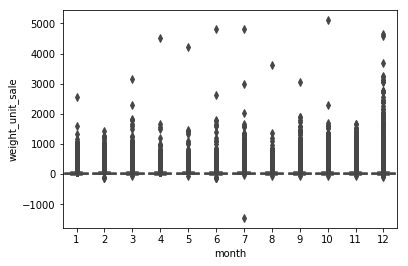

In [49]:
sns.boxplot(x=X['month'], y=X['weight_unit_sale'])

C:\Users\ZVI\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


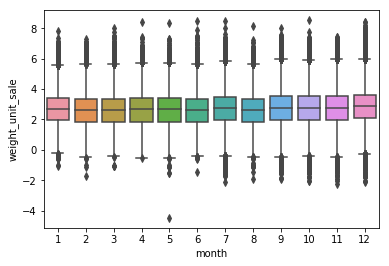

In [51]:
sns.boxplot(x=df['month'], y=np.log(df['weight_unit_sale']))


C:\Users\ZVI\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


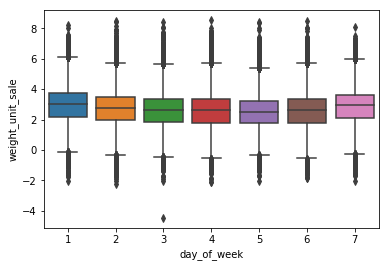

In [52]:
sns.boxplot(x=df['day_of_week'], y=np.log(df['weight_unit_sale']))

C:\Users\ZVI\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


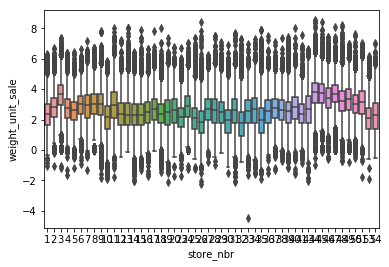

In [53]:
sns.boxplot(x=X['store_nbr'], y=np.log(X['weight_unit_sale']))

#f1['log_value'] = np.log(X2['weight_unit_sale'])

#print(df) 

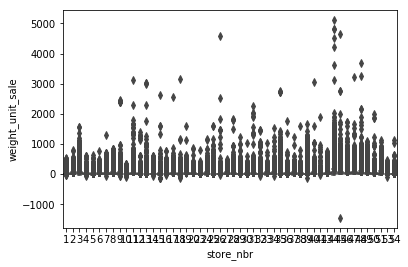

In [54]:
sns.boxplot(x=X['store_nbr'], y=X['weight_unit_sale'])

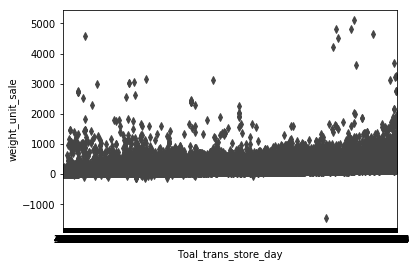

In [56]:
sns.boxplot(x=X['Toal_trans_store_day'], y=X['weight_unit_sale'])

In [ ]:
sns.boxplot(x=X['LocalHoliday'], y=X['weight_unit_sale'])

In [ ]:
sns.boxplot(x=X2['RegionalHoliday'], y=X2['weight_unit_sale'])

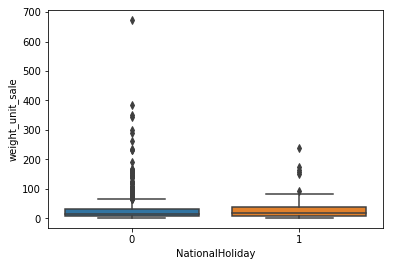

In [33]:
sns.boxplot(x=X2['NationalHoliday'], y=X2['weight_unit_sale'])

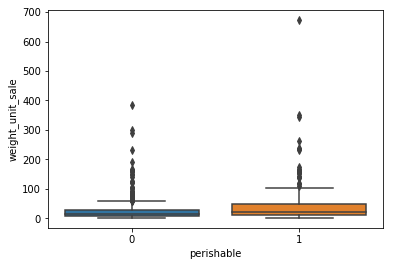

In [36]:
sns.boxplot(x=X2['perishable'], y=X2['weight_unit_sale'])

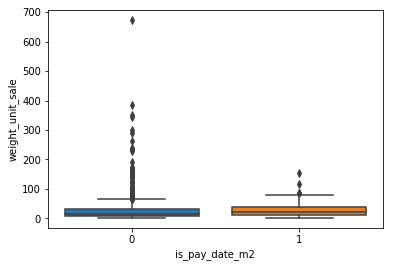

In [37]:
sns.boxplot(x=X2['is_pay_date_m2'], y=X2['weight_unit_sale'])

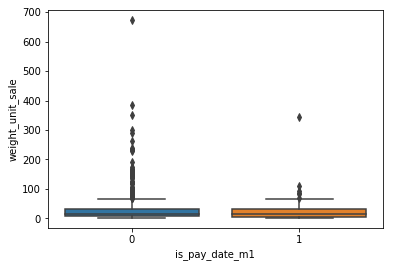

In [38]:
sns.boxplot(x=X2['is_pay_date_m1'], y=X2['weight_unit_sale'])

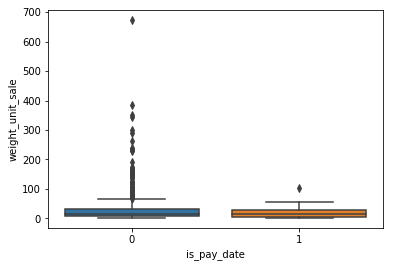

In [39]:
sns.boxplot(x=X2['is_pay_date'], y=X2['weight_unit_sale'])

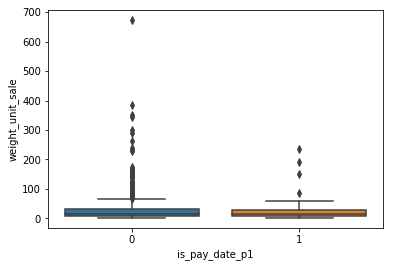

In [40]:
sns.boxplot(x=X2['is_pay_date_p1'], y=X2['weight_unit_sale'])

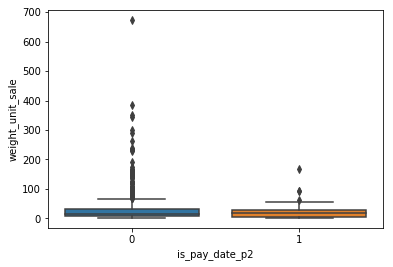

In [41]:
sns.boxplot(x=X2['is_pay_date_p2'], y=X2['weight_unit_sale'])

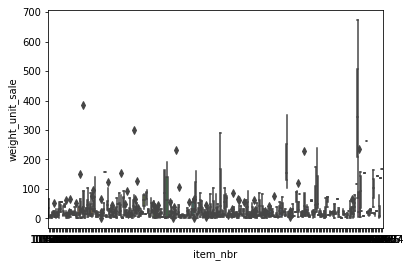

In [42]:
sns.boxplot(x=X2['item_nbr'], y=X2['weight_unit_sale'])

C:\Users\ZVI\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


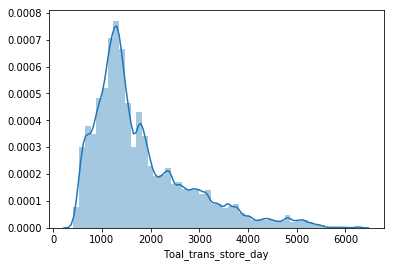

In [176]:
Toal_trans_store_day_BL = sns.distplot(X['Toal_trans_store_day'])

fig=Toal_trans_store_day_BL.get_figure()
fig.savefig('Toal_trans_store_day_BL.png')


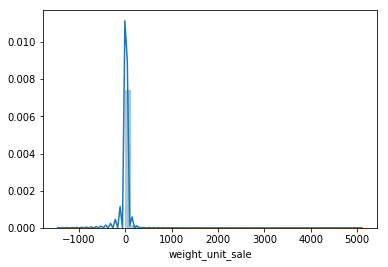

In [68]:
sns.distplot(X['weight_unit_sale'])
#sns.distplot(np.log(X['weight_unit_sale']))

#X.describe()

C:\Users\ZVI\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.
C:\Users\ZVI\Anaconda3\lib\site-packages\numpy\core\_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)
C:\Users\ZVI\Anaconda3\lib\site-packages\numpy\core\_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial)


ValueError: cannot convert float NaN to integer

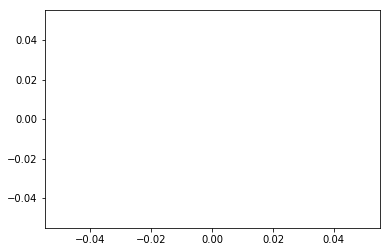

In [69]:
weight_unit_sale_log=sns.distplot(np.log(X['weight_unit_sale']))
fig=weight_unit_sale_log.get_figure()
fig.savefig('weight_unit_sale_log.png')

In [187]:
# weight_unit_sale

In [30]:
a = np.log(df['Toal_trans_store_day'])

df.weight_unit_sale 

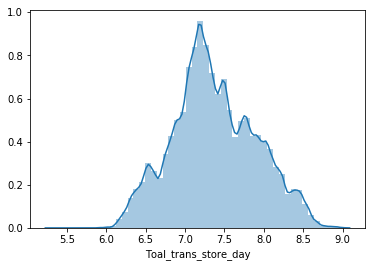

In [57]:
Toal_trans_store_day=sns.distplot(np.log(X['Toal_trans_store_day']))
fig=Toal_trans_store_day.get_figure()
fig.savefig('Toal_trans_store_day.png')

C:\Users\ZVI\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


ValueError: cannot convert float NaN to integer

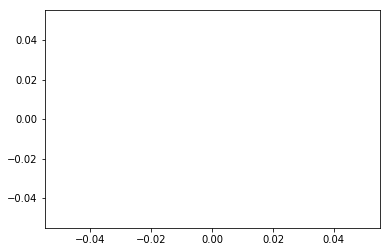

In [51]:
sns.distplot(np.log(X2['weight_unit_sale']))

# -------------------------------------------------------------------

In [69]:
X3=X.copy()

## Univariate Outlier detection for continuous numeric variables
 
#### Using Standard Deviation (z-scores)

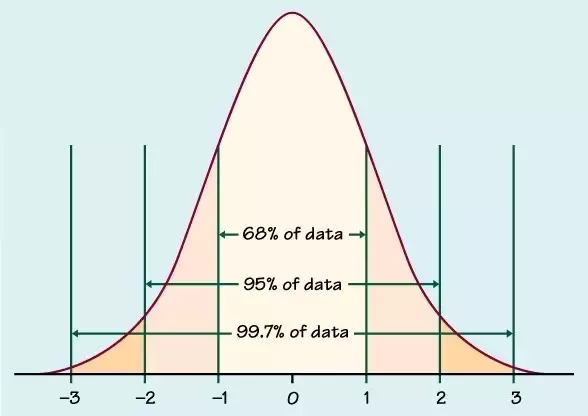

#### Using median and Interquartile range (Boxplot)

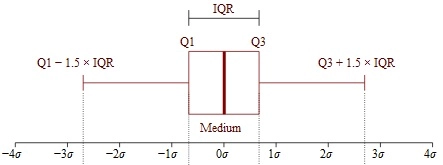

In [55]:
def zscore_outliers(x, cutoff=3.0, return_thresholds=False):
    """
    Return a boolean mask of outliers for a series
    using standard deviation, works column-wise.
    param nstd:
        Set number of standard deviations from the mean
        to consider an outlier
    :type nstd: ``float``
    param return_thresholds:
        True returns the lower and upper bounds, good for plotting.
        False returns the masked array 
    :type return_thresholds: ``bool``
    """
    dmean = x.mean()
    dsd = x.std()
    rng = dsd * cutoff
    lower = dmean - rng
    upper = dmean + rng
    if return_thresholds:
        return lower, upper
    else:
        return [True if z < lower or z > upper else False for z in x]


def iqr_outliers(x, k=1.5, return_thresholds=False):
    """
    Return a boolean mask of outliers for a series
    using interquartile range, works column-wise.
    param k:
        some cutoff to multiply by the iqr
    :type k: ``float``
    param return_thresholds:
        True returns the lower and upper bounds, good for plotting.
        False returns the masked array 
    :type return_thresholds: ``bool``
    """
    # calculate interquartile range
    q25 = np.percentile(x, 25)
    q75 = np.percentile(x, 75)
    iqr = q75 - q25
    # calculate the outlier cutoff
    cut_off = iqr * k
    lower, upper = q25 - cut_off, q75 + cut_off
    if return_thresholds:
        return lower, upper
    else: # identify outliers
        return [True if z < lower or z > upper else False for z in x]

In [270]:
#out1 = zscore_outliers(X['weight_unit_sale'], cutoff=1.25, return_thresholds=False)
np.sum(out1)
out3 = zscore_outliers(X_cat_sample['weight_unit_sale'], cutoff=1.25, return_thresholds=False)
np.sum(out3)

61

In [301]:
type(out3)

list

In [47]:
zscore_outliers(X['weight_unit_sale'], return_thresholds=True)

(-106.87538896206709, 162.10788399156988)

In [132]:
out1 = zscore_outliers(X['weight_unit_sale'], cutoff =1.25, return_thresholds=False)
np.sum(out1)

176905

In [98]:
zscore_outliers(np.log(X['weight_unit_sale']), return_thresholds=True)

C:\Users\ZVI\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


(-0.8480047902495942, 6.182477988709401)

In [91]:
out2 = iqr_outliers(np.log(X['weight_unit_sale']), k=1.25, return_thresholds=False)
np.sum(out2)  

NameError: name 'iqr_outliers' is not defined

In [96]:
out2 = iqr_outliers(np.log(X['weight_unit_sale']), k=1.25, return_thresholds=False)
np.sum(out2)  

C:\Users\ZVI\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.
C:\Users\ZVI\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4291: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


0

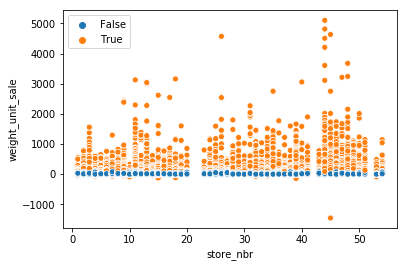

In [100]:
sns.scatterplot(x=X['store_nbr'],y=X['weight_unit_sale'],hue=out1) 

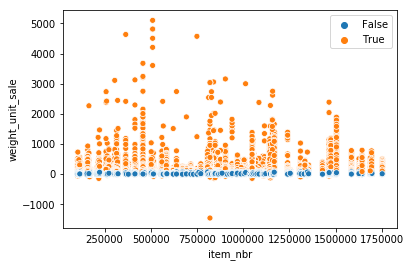

In [101]:
sns.scatterplot(x=X['item_nbr'],y=X['weight_unit_sale'],hue=out1) 

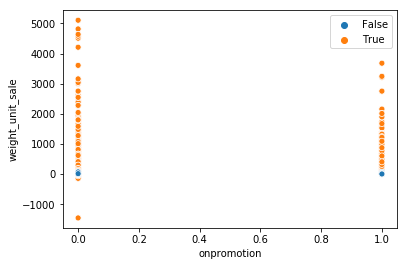

In [102]:
sns.scatterplot(x=X['onpromotion'],y=X['weight_unit_sale'],hue=out1) 


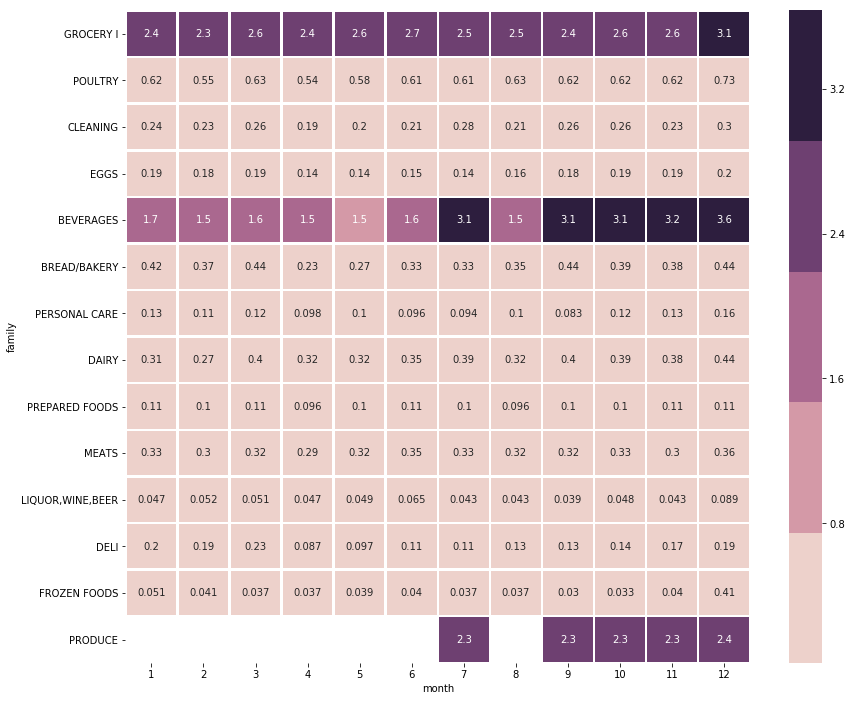

In [198]:
#77777
#Cross_t= pd.crosstab(index=[X['store_nbr'],X['family']],columns=[X['month'],X['day_of_week']],margins=True,values=X['weight_unit_sale'],aggfunc='sum')
total_unit_sale = X.weight_unit_sale.sum()
#   /total_unit_sale
#X['store_nbr']
Cross_t= pd.crosstab(index=[X['family']],columns=[X['month']],
                     margins=False,values=X['weight_unit_sale']/total_unit_sale*100,aggfunc='sum')
#Cross_t
fig, ax = plt.subplots(figsize=(1*len(X['family'].unique()),len(X['month'].unique())))
fig_month_log=sns.heatmap(Cross_t,annot=True,linewidths=1.5,ax=ax,cmap=sns.cubehelix_palette(5))
#Cross_t

fig=fig_month_log.get_figure()
fig.savefig('fig_month_log.png')

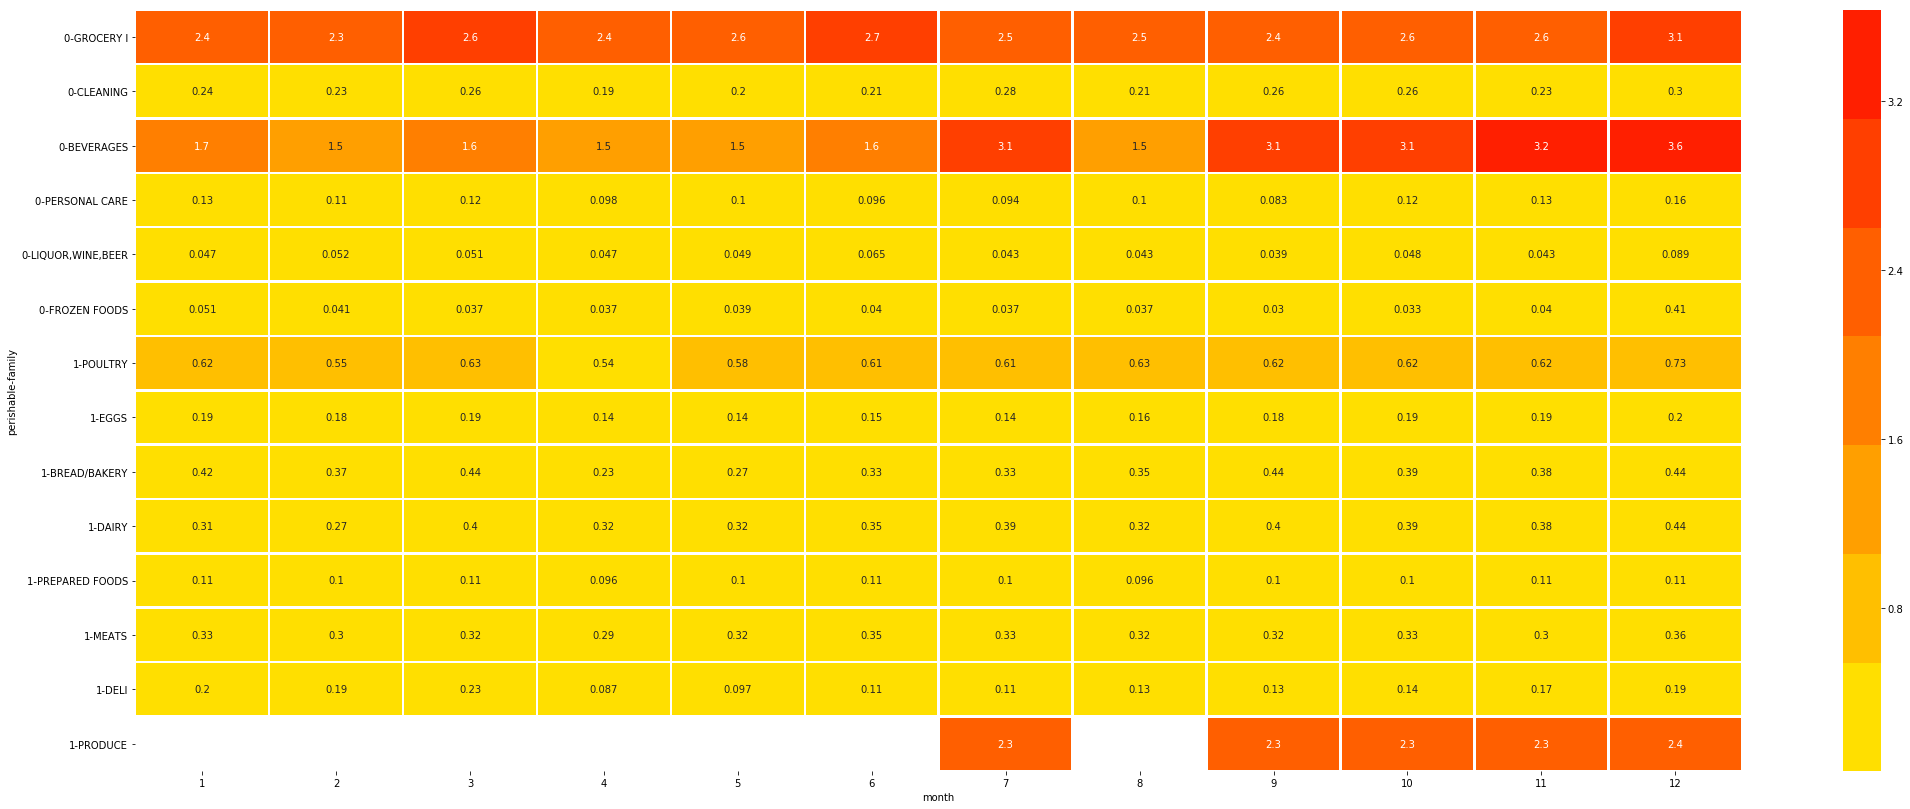

In [196]:
#77777
#Cross_t= pd.crosstab(index=[X['store_nbr'],X['family']],columns=[X['month'],X['day_of_week']],margins=True,values=X['weight_unit_sale'],aggfunc='sum')
total_unit_sale = X.weight_unit_sale.sum()
#   /total_unit_sale

Cross_t= pd.crosstab(index=[X['perishable'],X['family']],columns=[X['month']],margins=False,values=X['weight_unit_sale']/total_unit_sale*100,aggfunc='sum')
#Cross_t
fig, ax = plt.subplots(figsize=(3*len(X['month'].unique()),len(X['family'].unique())))
sns.heatmap(Cross_t,annot=True,linewidths=1.5,ax=ax,cmap=sns.color_palette('autumn_r',7))
#Cross_t

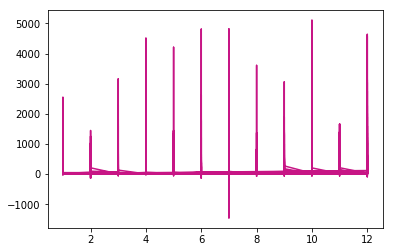

In [193]:
plt.plot('month', 'weight_unit_sale', data=X, color='mediumvioletred')
plt.show()
 


In [ ]:
sns.scatterplot(x=X['perishable'],y=X['weight_unit_sale'],hue=out2) 

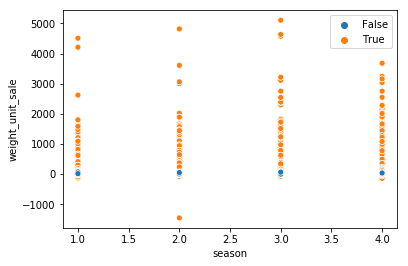

In [104]:
sns.scatterplot(x=X['season'],y=X['weight_unit_sale'],hue=out1)

NameError: name 'x' is not defined

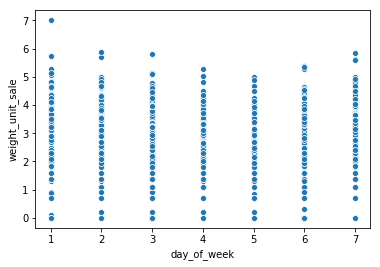

In [83]:
#sns.scatterplot(x=X['day_of_week'],y=X['weight_unit_sale'],hue=out1)
#sns.scatterplot(x=X_cat_sample['day_of_week'],y=np.log(X_cat_sample['weight_unit_sale']),hue=out1)
g=sns.scatterplot(x=X_cat_sample[],y=np.log(X_cat_sample['weight_unit_sale']))
g.set_xticklabels(labels = x,rotation=30)


In [90]:
sns.scatterplot(x=X_cat_sample['family'],y=X_cat_sample['weight_unit_sale'] ,hue=out3)
#ax.set_xticklabels(rotation=40)
#fig_family=sns.scatterplot(x=X_cat_sample['family'],y=X_cat_sample['weight_unit_sale'] ,hue=out3)
##22222
#import matplotlib.pyplot as plt

#plt.plot(x, y, 'ro')
# You can specify a rotation for the tick labels in degrees or with keywords.
#   plt.xticks(x, labels, rotation='vertical')
# Pad margins so that markers don't get clipped by the axes
#    plt.margins(0.2)
# Tweak spacing to prevent clipping of tick-labels
# plt.subplots_adjust(bottom=0.15)
# plt.show()


#fig_family = sns.factorplot("year", data=planets, aspect=1.5, kind="count", color="b")
#fig_family.set_context("family", font_scale=0.9)

#fig_family.set_xticklabels(ta=30) 




NameError: name 'out3' is not defined

In [89]:
#import seaborn as sns
#planets = sns.load_dataset("planets")
? factorplot

#g.set_xticklabels(rotation=30)

Object `factorplot` not found.


In [139]:
#X4 = X.loc [:,['family_cat_4', 'family_cat_6', 'family_cat_8', 'family_cat_9', 'family_cat_10', 'family_cat_11', 'family_cat_12',
# 'family_cat_13', 'family_cat_23', 'family_cat_25', 'family_cat_26', 'family_cat_29', 'family_cat_30', 'family_cat_31']]



In [ ]:
X4 = X[['family','family']]
X4

In [45]:
out1 = zscore_outliers(X2['ash'], cutoff=3.0, return_thresholds=False)
np.sum(out1)

3

C:\Users\ZVI\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


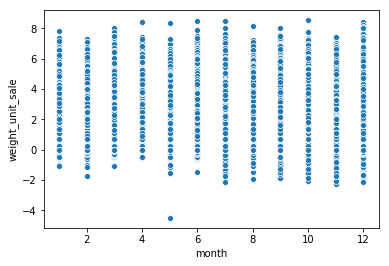

In [45]:
fig_month_log=sns.scatterplot(x=X['month'],y=np.log(X['weight_unit_sale']))
fig=fig_month_log.get_figure()
fig.savefig('fig_month_log.png')

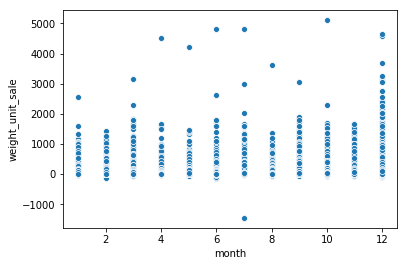

In [44]:
fig_month=sns.scatterplot(x=X['month'],y=X['weight_unit_sale'])
fig=fig_month.get_figure()
fig.savefig('fig_month.png')

In [ ]:
df1 = df.copy(c[:,df.stor_nbr])

## Multivariate Outlier Analysis

For multivariate outlier detection we can use DBSCAN. This algorithm search for aggregation of points that are combined and leave out of them the outlier points.

<img src="https://en.proft.me/media/science/r_dbc_points.png"> </img>



In [98]:
## X is an numpy array
def dbscan_mvoutliers(X):
    from sklearn.cluster import DBSCAN
    from sklearn.preprocessing import StandardScaler
    # scale data first
    X = StandardScaler().fit_transform(X.values)

    db = DBSCAN(eps=3.0, min_samples=10).fit(X)
    labels = db.labels_

    plt.figure(figsize=(10,10))

    unique_labels = set(labels)
    colors = ['blue', 'red']

    for color,label in zip(colors, unique_labels):
        sample_mask = [True if l == label else False for l in labels]
        plt.plot(X[:,0][sample_mask], X[:, 1][sample_mask], 'o', color=color);
    plt.xlabel('x');
    plt.ylabel('y');
    return(db)

#55555

In [101]:
#from sklearn.cluster import 

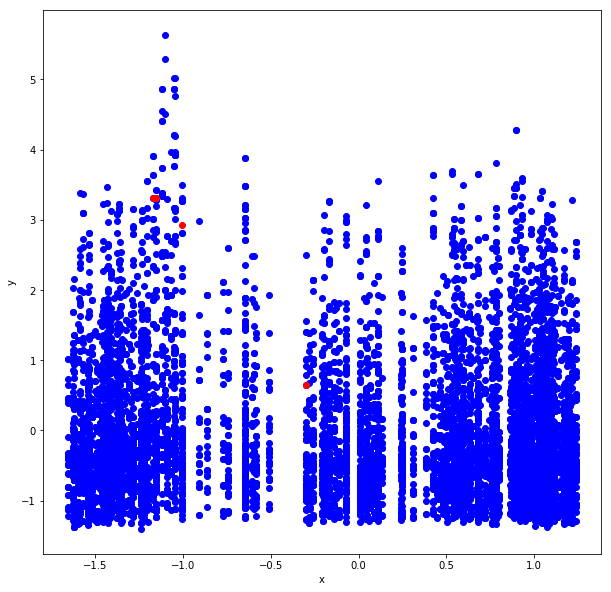

In [106]:
dbsc1 = dbscan_mvoutliers(X_cat_sample2)


dbsc1 = dbscan_mvoutliers(X_cat_sample1)


In [209]:
dbsc1.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

### Treating outliers: To drop or not to drop?
 
- If it is obviously due to incorrectly entered or measured data,  drop it 
- If it does not change the results but does affect assumptions, drop it (report!)
- If it affects both results and assumptions. Don’t drop it. (Analyze with and without. Report!)
- If it creates a significant association, drop it



In [257]:
X_cat_sample_back = X_cat_sample.copy()

In [85]:
#X_cat_sample1 = X[['Toal_trans_store_day','weight_unit_sale']]
X_cat_sample2 = X_sample1[['dcoilwtico','Toal_trans_store_day','weight_unit_sale']]

In [ ]:
X_cat_sample2

In [ ]:
 
outliers =  dbscan_mvoutliers(X_cat_sample2)

 

In [ ]:
np.sum(outliers.labels_)

In [80]:
X_sample3=X_sample


In [83]:
outliers1 = outliers.labels_
outliers1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [95]:
X.loc[outliers.labels_,]


C:\Users\ZVI\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.


date  month  day_of_week  season  store_nbr  item_nbr  \
 0 2014-04-01      4            3       1          1   105,575   
 0 2014-04-01      4            3       1          1   105,575   
 0 2014-04-01      4            3       1          1   105,575   
 0 2014-04-01      4            3       1          1   105,575   
 0 2014-04-01      4            3       1          1   105,575   
 0 2014-04-01      4            3       1          1   105,575   
 0 2014-04-01      4            3       1          1   105,575   
 0 2014-04-01      4            3       1          1   105,575   
 0 2014-04-01      4            3       1          1   105,575   
 0 2014-04-01      4            3       1          1   105,575   
 0 2014-04-01      4            3       1          1   105,575   
 0 2014-04-01      4            3       1          1   105,575   
 0 2014-04-01      4            3       1          1   105,575   
 0 2014-04-01      4            3       1          1   105,575   
 0 2014-04-01      4            3       1          1   105,575   
 0 2014-04-01      4            3       1          1   105,575   
 0 2014-04-01      4            3       1          1   105,575   
 0 2014-04-01      4            3       1          1   105,575   
 0 2014-04-01      4            3       1          1   105,575   
 0 2014-04-01      4            3       1          1   105,575   
 0 2014-04-01      4            3       1          1   105,575   
 0 2014-04-01      4            3       1          1   105,575   
 0 2014-04-01      4            3       1          1   105,575   
 0 2014-04-01      4            3       1          1   105,575   
 0 2014-04-01      4            3       1          1   105,575   
 0 2014-04-01      4            3       1          1   105,575   
 0 2014-04-01      4            3       1          1   105,575   
 0 2014-04-01      4            3       1          1   105,575   
 0 2014-04-01      4            3       1          1   105,575   
 0 2014-04-01      4            3       1          1   105,575   
 0 2014-04-01      4            3       1          1   105,575   
 0 2014-04-01      4            3       1          1   105,575   
 0 2014-04-01      4            3       1          1   105,575   
 0 2014-04-01      4            3       1          1   105,575   
 0 2014-04-01      4            3       1          1   105,575   
 0 2014-04-01      4            3       1          1   105,575   
 0 2014-04-01      4            3       1          1   105,575   
 0 2014-04-01      4            3       1          1   105,575   
 0 2014-04-01      4            3       1          1   105,575   
 0 2014-04-01      4            3       1          1   105,575   
 0 2014-04-01      4            3       1          1   105,575   
 0 2014-04-01      4            3       1          1   105,575   
 0 2014-04-01      4            3       1          1   105,575   
 0 2014-04-01      4            3       1          1   105,575   
 0 2014-04-01      4            3       1          1   105,575   
 0 2014-04-01      4            3       1          1   105,575   
 0 2014-04-01      4            3       1          1   105,575   
 0 2014-04-01      4            3       1          1   105,575   
 0 2014-04-01      4            3       1          1   105,575   
 0 2014-04-01      4            3       1          1   105,575   
 0 2014-04-01      4            3       1          1   105,575   
 0 2014-04-01      4            3       1          1   105,575   
 0 2014-04-01      4            3       1          1   105,575   
 0 2014-04-01      4            3       1          1   105,575   
 0 2014-04-01      4            3       1          1   105,575   
 0 2014-04-01      4            3       1          1   105,575   
 0 2014-04-01      4            3       1          1   105,575   
 0 2014-04-01      4            3       1          1   105,575   
 0 2014-04-01      4            3       1          1   105,575   
 0 2014-04-01      4            3       1        

In [96]:
X.loc[1:10,]


date  month  day_of_week  season  store_nbr  item_nbr  \
1  2014-04-01      4            3       1          1    111223   
2  2014-04-01      4            3       1          1    114790   
3  2014-04-01      4            3       1          1    115611   
4  2014-04-01      4            3       1          1    115892   
5  2014-04-01      4            3       1          1    115894   
6  2014-04-01      4            3       1          1    116017   
7  2014-04-01      4            3       1          1    153267   
8  2014-04-01      4            3       1          1    159156   
9  2014-04-01      4            3       1          1    165594   
10 2014-04-01      4            3       1          1    168927   

    Toal_trans_store_day   city  city_population      state type  cluster  \
1                   1847  Quito          1399814  Pichincha    D       13   
2                   1847  Quito          1399814  Pichincha    D       13   
3                   1847  Quito          1399814  Pichincha    D       13   
4                   1847  Quito          1399814  Pichincha    D       13   
5                   1847  Quito          1399814  Pichincha    D       13   
6                   1847  Quito          1399814  Pichincha    D       13   
7                   1847  Quito          1399814  Pichincha    D       13   
8                   1847  Quito          1399814  Pichincha    D       13   
9                   1847  Quito          1399814  Pichincha    D       13   
10                  1847  Quito          1399814  Pichincha    D       13   

       family  class LocalHoliday RegionalHoliday NationalHoliday  \
1   GROCERY I   1034            0               0               0   
2   GROCERY I   1004            0               0               0   
3   GROCERY I   1014            0               0               0   
4   GROCERY I   1016            0               0               0   
5   GROCERY I   1016            0               0               0   
6   GROCERY I   1072            0               0               0   
7   GROCERY I   1096            0               0               0   
8     POULTRY   2416            0               0               0   
9   GROCERY I   1014            0               0               0   
10   CLEANING   3026            0               0               0   

    weight_unit_sale  onpromotion  perishable cat_type_A cat_type_B  \
1                  6            0           0          0          0   
2                  9            0           0          0          0   
3                 46            0           0          0          0   
4                  2            0           0          0          0   
5                 16            0           0          0          0   
6                  6            0           0          0          0   
7                  8            0           0          0          0   
8                 86            0           1          0          0   
9                  8            0           0          0          0   
10                14            0           0          0          0   

   cat_type_C cat_type_D cat_type_E Family_cat_1 Family_cat_2 Family_cat_3  \
1           0          1          0            0            0            0   
2           0          1          0            0            0            0   
3           0          1          0            0            0            0   
4           0          1          0            0            0            0   
5           0          1          0            0            0            0   
6           0          1          0            0            0            0   
7           0          1          0            0            0            0   
8           0          1          0            0            0            0   
9           0          1          0            0            0            0   
10          0          1          0            0            0            0   

   Family_cat_4 Family_cat_5 Fami

In [ ]:
#### delete the row for mv outlier

X1 = X.loc[-outliers.labels_,]

In [ ]:
X.iloc[outlier_index,'ct'] = np.nan

In [86]:
X_cat_sample2['outliers'] = outliers1.astype('int64')

for c in X_cat_sample2.columns:
    v1 = X_cat_sample2.loc[X_cat_sample2[c]==0,c]
    v2 = X_cat_sample2.loc[:,c]
    print([c,v1.mean(),v2.mean(),X_cat_sample2[c].sum()])
    
#X * outliers.astype('int64')

['dcoilwtico', nan, 80.34591200000023, 803459.12]
['Toal_trans_store_day', nan, 1836.8732, 18368732]
['weight_unit_sale', nan, 27.547437562500022, 275474.37562500004]
['outliers', 0.0, -0.0004, -4]


In [63]:
#12121212    Quitodf['Nu
is_Quito = X[(X['city'] == 'Quito')]

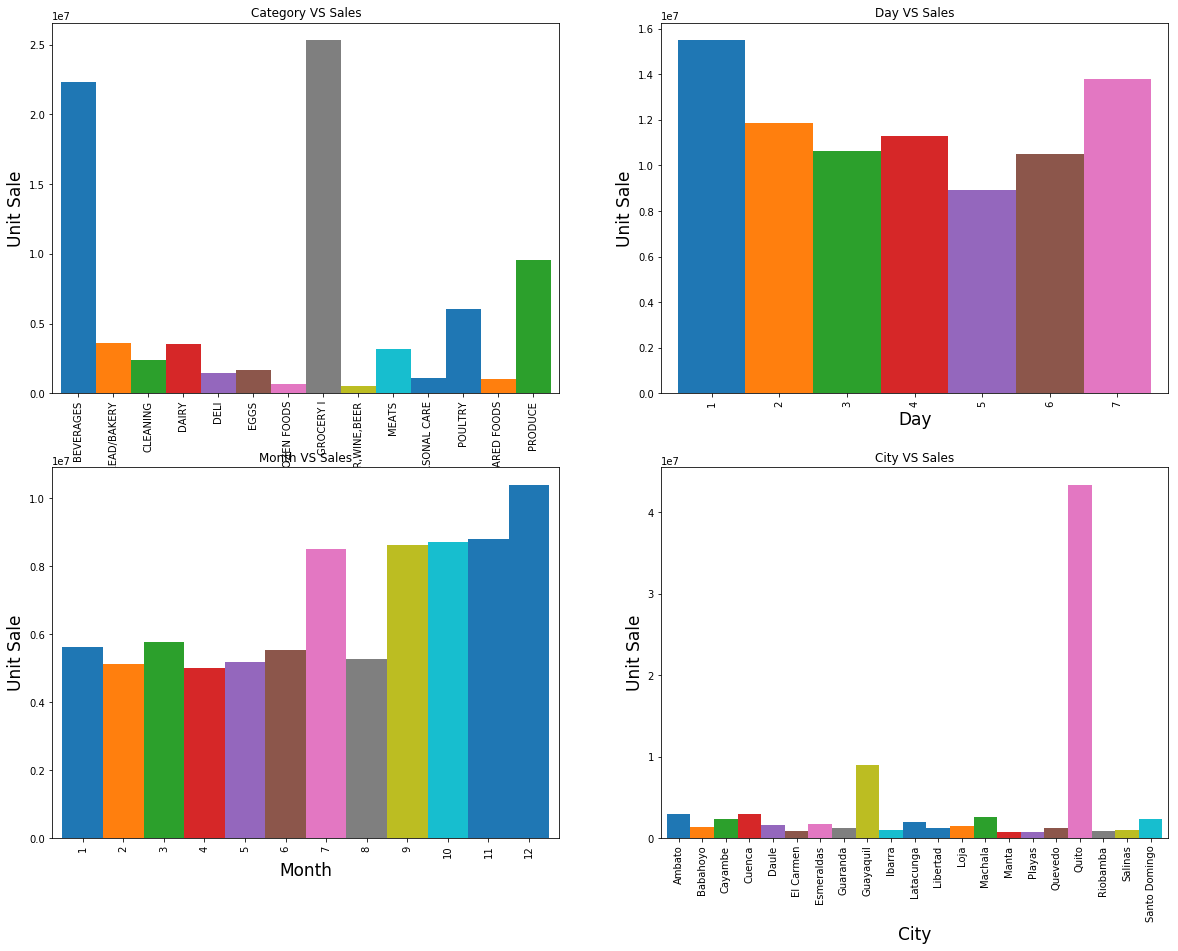

In [273]:
fig = plt.figure(figsize=(20,15))

ax=fig.add_subplot(221)
X.groupby("family").sum()['weight_unit_sale'].plot(kind='bar', 
                                                                   width=1, 
                                                                   ax=ax)
plt.xlabel("Category",fontsize=17)
plt.ylabel("Unit Sale",fontsize=17)
plt.title("Category VS Sales")

ax2=fig.add_subplot(222)
X.groupby("day_of_week").sum()['weight_unit_sale'].plot(kind='bar', 
                                                                   width=1, 
                                                                   ax=ax2)
plt.xlabel("Day",fontsize=17)
plt.ylabel("Unit Sale",fontsize=17)
plt.title("Day VS Sales")
#plt.ylim(0,25000)

ax3=fig.add_subplot(223)
X.groupby("month").sum()['weight_unit_sale'].plot(kind='bar', 
                                                                   width=1, 
                                                                   ax=ax3)
plt.xlabel("Month",fontsize=17)
plt.ylabel("Unit Sale",fontsize=17)
plt.title("Month VS Sales")

ax4=fig.add_subplot(224)
X.groupby("city").sum()['weight_unit_sale'].plot(kind='bar', 
                                                                   width=1, 
                                                                   ax=ax4)
plt.xlabel("City",fontsize=17)
plt.ylabel("Unit Sale",fontsize=17)
plt.title("City VS Sales")

plt.savefig('N_VS_weight_unit_sale.png')


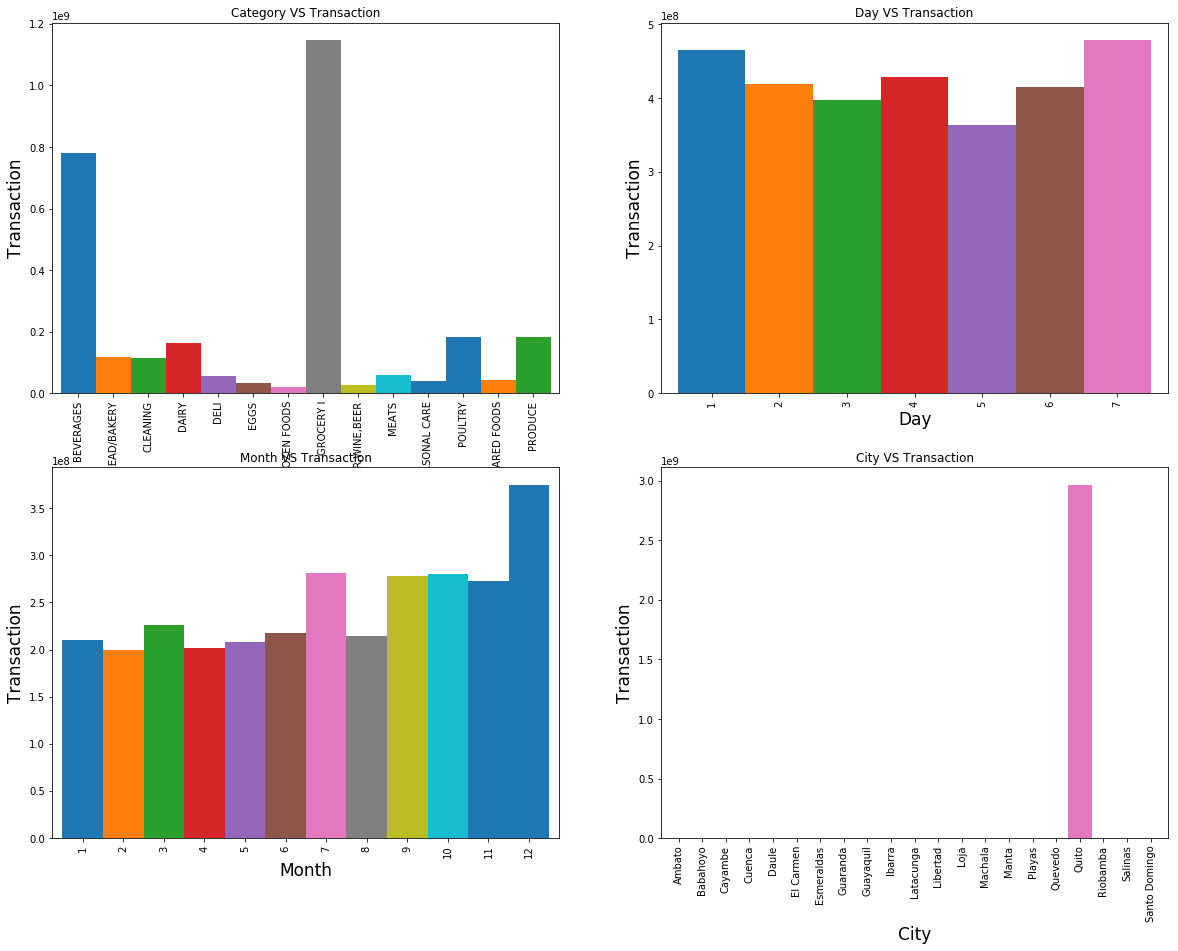

In [282]:
fig1 = plt.figure(figsize=(20,15))

ax=fig1.add_subplot(221)
is_Quito.groupby("family").sum()['Toal_trans_store_day'].plot(kind='bar', 
                                                                   width=1, 
                                                                   ax=ax)
plt.xlabel("Category",fontsize=17)
plt.ylabel("Transaction",fontsize=17)
plt.title("Category VS Transaction")


ax2=fig1.add_subplot(222)
is_Quito.groupby("day_of_week").sum()['Toal_trans_store_day'].plot(kind='bar', 
                                                                   width=1, 
                                                                   ax=ax2)
plt.xlabel("Day",fontsize=17)
plt.ylabel("Transaction",fontsize=17)
plt.title("Day VS Transaction")
#plt.ylim(0,25000)

ax3=fig1.add_subplot(223)
is_Quito.groupby("month").sum()['Toal_trans_store_day'].plot(kind='bar', 
                                                                   width=1, 
                                                                   ax=ax3)
plt.xlabel("Month",fontsize=17)
plt.ylabel("Transaction",fontsize=17)
plt.title("Month VS Transaction")

ax4=fig1.add_subplot(224)
is_Quito.groupby("city").sum()['Toal_trans_store_day'].plot(kind='bar', 
                                                                   width=1, 
                                                                   ax=ax4)
plt.xlabel("City",fontsize=17)
plt.ylabel("Transaction",fontsize=17)
plt.title("City VS Transaction")

plt.savefig('N_VS_Toal_trans_store_day is_Quito.png')


In [283]:
is_Quito = X.loc[X['city']=='Quito']
     
#is_Quito = X[(X['city'] == 'Quito')
is_Quito

date  month  day_of_week season  store_nbr  item_nbr  \
0       2014-04-01      4            3      1          1    105575   
1       2014-04-01      4            3      1          1    111223   
2       2014-04-01      4            3      1          1    114790   
3       2014-04-01      4            3      1          1    115611   
4       2014-04-01      4            3      1          1    115892   
5       2014-04-01      4            3      1          1    115894   
6       2014-04-01      4            3      1          1    116017   
7       2014-04-01      4            3      1          1    153267   
8       2014-04-01      4            3      1          1    159156   
9       2014-04-01      4            3      1          1    165594   
10      2014-04-01      4            3      1          1    168927   
11      2014-04-01      4            3      1          1    208384   
12      2014-04-01      4            3      1          1    211203   
13      2014-04-01      4            3      1          1    215331   
14      2014-04-01      4            3      1          1    215352   
15      2014-04-01      4            3      1          1    219150   
16      2014-04-01      4            3      1          1    220435   
17      2014-04-01      4            3      1          1    222879   
18      2014-04-01      4            3      1          1    257847   
19      2014-04-01      4            3      1          1    258396   
20      2014-04-01      4            3      1          1    261052   
21      2014-04-01      4            3      1          1    261053   
22      2014-04-01      4            3      1          1    265254   
23      2014-04-01      4            3      1          1    265279   
24      2014-04-01      4            3      1          1    265559   
25      2014-04-01      4            3      1          1    273528   
26      2014-04-01      4            3      1          1    305080   
27      2014-04-01      4            3      1          1    305229   
28      2014-04-01      4            3      1          1    311994   
29      2014-04-01      4            3      1          1    314384   
30      2014-04-01      4            3      1          1    315176   
31      2014-04-01      4            3      1          1    315179   
32      2014-04-01      4            3      1          1    315180   
33      2014-04-01      4            3      1          1    315220   
34      2014-04-01      4            3      1          1    315277   
35      2014-04-01      4            3      1          1    315474   
36      2014-04-01      4            3      1          1    320682   
37      2014-04-01      4            3      1          1    323013   
38      2014-04-01      4            3      1          1    364606   
39      2014-04-01      4            3      1          1    364738   
40      2014-04-01      4            3      1          1    368136   
41      2014-04-01      4            3      1          1    378685   
42      2014-04-01      4            3      1          1    410257   
43      2014-04-01      4            3      1          1    414353   
44      2014-04-01      4            3      1          1    414750   
45      2014-04-01      4            3      1          1    418235   
46      2014-04-01      4            3      1          1    452212   
47      2014-04-01      4            3      1          1    457928   
48      2014-04-01      4            3      1          1    464374   
49      2014-04-01      4            3      1          1    502331   
50      2014-04-01      4            3      1          1    507969   
51      2014-04-01      4            3      1          1    510054   
52      2014-04-01      4            3      1          1    514144   
53      2014-04-01      4            3      1          1    514327   
54      2014-04-01      4            3      1          1    554049   
55      2014-04-01      4            3      1          1    557256   
56      2014-04-01      

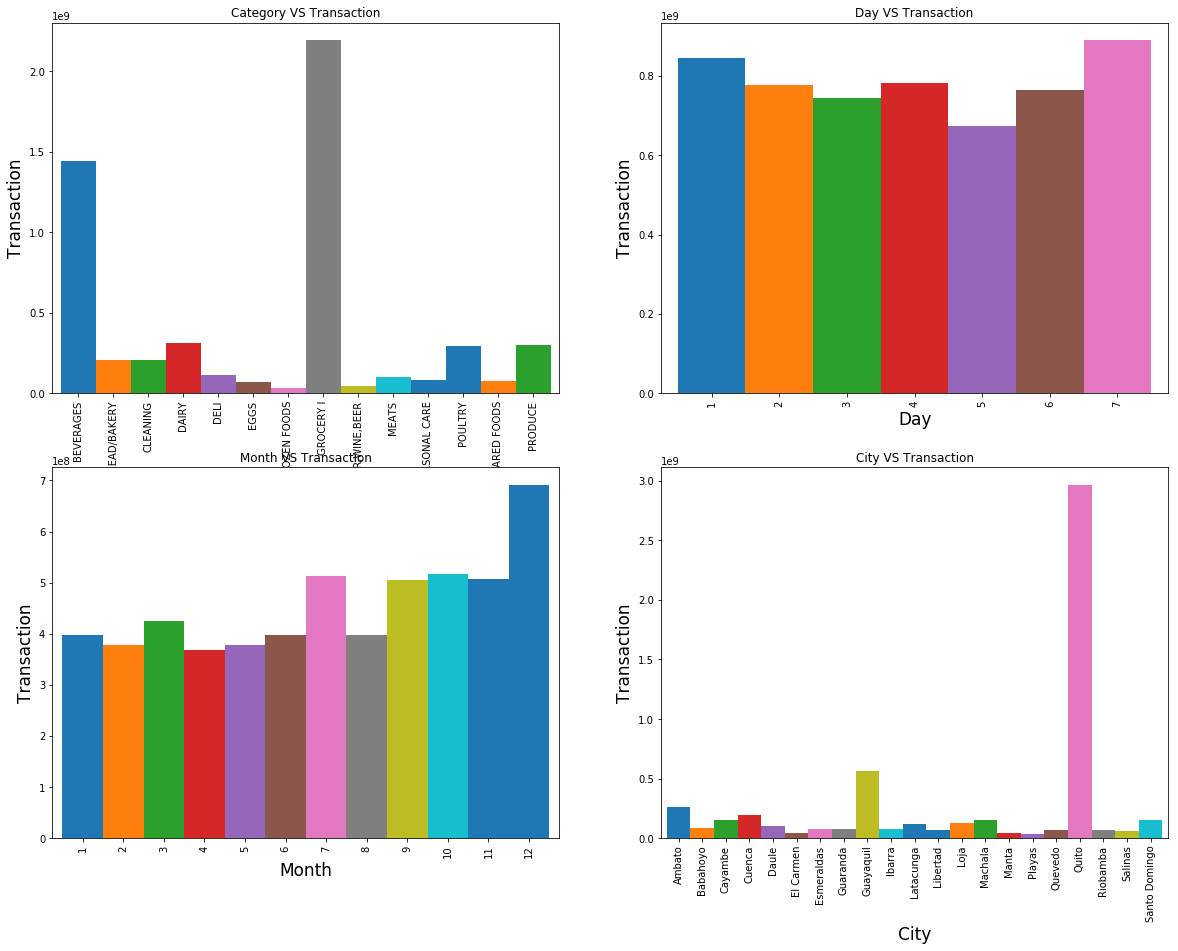

In [284]:
fig1 = plt.figure(figsize=(20,15))

ax=fig1.add_subplot(221)
X.groupby("family").sum()['Toal_trans_store_day'].plot(kind='bar', 
                                                                   width=1, 
                                                                   ax=ax)
plt.xlabel("Category",fontsize=17)
plt.ylabel("Transaction",fontsize=17)
plt.title("Category VS Transaction")


ax2=fig1.add_subplot(222)
X.groupby("day_of_week").sum()['Toal_trans_store_day'].plot(kind='bar', 
                                                                   width=1, 
                                                                   ax=ax2)
plt.xlabel("Day",fontsize=17)
plt.ylabel("Transaction",fontsize=17)
plt.title("Day VS Transaction")
#plt.ylim(0,25000)

ax3=fig1.add_subplot(223)
X.groupby("month").sum()['Toal_trans_store_day'].plot(kind='bar', 
                                                                   width=1, 
                                                                   ax=ax3)
plt.xlabel("Month",fontsize=17)
plt.ylabel("Transaction",fontsize=17)
plt.title("Month VS Transaction")

ax4=fig1.add_subplot(224)
X.groupby("city").sum()['Toal_trans_store_day'].plot(kind='bar', 
                                                                   width=1, 
                                                                   ax=ax4)
plt.xlabel("City",fontsize=17)
plt.ylabel("Transaction",fontsize=17)
plt.title("City VS Transaction")

plt.savefig('N_VS_Toal_trans_store_day.png')


In [212]:
#6666666
#XX = XX[['day_of_week','weight_unit_sale']]
outliers = outliers.astype('int64')
#XX.dtypes
XX.columns
V1=XX.loc[XX['day_of_week']==0,'day_of_week']
V2= XX.loc[:,'day_of_week']
#print(['day_of_week',v1.mean(),v2.mean(),outliers['day_of_week'].sum()])
print(['day_of_week',v1.mean(),v2.mean()])

AttributeError: 'DBSCAN' object has no attribute 'astype'

In [ ]:
### Check if outliers modify 
outliers = out3.astype('int64')
#33333
for c in XX.columns:
    v1 = XX.loc[XX[c]==0,c]
    v2 = XX.loc[:,c]
    print([c,v1.mean(),v2.mean(),outliers[c].sum()])
    
#X * outliers.astype('int64')

In [62]:
varnm = ['store_nbr','item_nbr','Toal_trans_store_day']

In [ ]:
for i in range(0,7):
    fig, ax = plt.subplots(1, sharex='col', sharey='row')
#for c in varnm:
    plt.hist(X[varnm[i]])
    plt.hist(X.loc[outliers[varnm[i]]==0,varnm[i]])

# Missing Values

In [ ]:
X3[['month','day_of_week']]

In [ ]:
### pip install missingno
import missingno as msno

### plot the missingness (nullity) matrix
missingdata_df = X.columns[animals.isnull().any()].tolist()
msno.matrix(X[missingdata_df])

In [ ]:
msno.heatmap(X[missingdata_df], figsize=(5,5))

In [ ]:
X2 = X.copy()
for c in X2.columns:
    if X2[c].isnull().sum()>0 :
        newnm = c + '_na'
        X2[newnm] = 0
        X2.loc[(X2[c].isnull()),[newnm]] = 1
X2.head()

In [ ]:
## select variables with full data
fulldt = [...] 
y_train = X2.loc[:,(<<var_na>>)]
X_train = X_train.loc[:,fulldt]


In [ ]:
### repeat this for each variable having missing values
import statsmodels.api as sm

cnst = sm.add_constant(X_train)
est = sm.OLS(y_train, cnst)
est2 = est.fit()
print(est2.summary())

## Missing Values Imputation

### Dropout

In [ ]:
X2 = animals.copy()
# drop rows with missing values
X2.dropna(inplace=True)
# summarize the number of rows and columns in the dataset
print(X2.shape)


In [ ]:
### check for changes in the statistics
print(X.describe())
print("----------------------------------------------------------------------------------")
print(X2.describe())

### Statistical Imputation
 
This imply to substitute missing values by a statistical measure. The most commonly used are the mean and the median.

In [ ]:
# impute mean for the following vars: sws, ps, ts, mls, gt
X2 = X.copy()
for c in X2.columns:
    if X2[c].isnull().sum()>0 :
        mn = X2[c].mean()
        animals2[c] = animals2[c].fillna(mn)
X2.head()

In [ ]:
### check for changes in the statistics
print(X.describe())
print("----------------------------------------------------------------------------------")
print(X2.describe())

In [ ]:
### print a graph for each imputed variable (repeat for each)
sns.scatterplot(x=<<var>>,y=<<other_complete_var>>,data=X2)

In [ ]:
# impute median for the following vars: sws, ps, ts, mls, gt
X2 = X.copy()
for c in X2.columns:
    if X2[c].isnull().sum()>0 :
        mn = X2[c].median()
        animals2[c] = animals2[c].fillna(mn)
X2.head()

In [ ]:
### check for changes in the statistics
print(X.describe())
print("----------------------------------------------------------------------------------")
print(X2.describe())

In [ ]:
### print a graph for each imputed variable (repeat for each)
sns.scatterplot(x=<<var>>,y=<<other_complete_var>>,data=X2)

### Machine Learning imputation: kNN imputation

In [ ]:
X_train = X2.copy()
fulldt = [...] 
X_train.dropna(inplace=True)
y_train = X_train.loc[:,(<<var_with_miss>>]
X_train = X_train.loc[:,(fulldt)]
print(y_train.shape)
print(X_train.shape)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
reg = KNeighborsRegressor(n_neighbors=5)  
reg.fit(X_train, y_train)  

In [ ]:
X_test = X2.loc[(X2[<<var_with_miss].isnull()),fulldt]
y_pred = reg.predict(X_test)

In [ ]:
len(y_pred)
y_train1 = pd.DataFrame({'y':y_train, 'miss_var':X_train['miss_var']})
y_train1[<<other_var>>] = 0

y_pred1 = pd.DataFrame({'y':y_pred, 'miss_var':X_test['miss_var']})
y_pred1[<<other_var>>] = 1

y = pd.concat([y_train1,y_pred1])
y.head()

In [ ]:
### plot the vars
sns.scatterplot(x='miss_var',y='y', data=y,hue=<<other_var>>)